<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://www.np.edu.sg/PublishingImages/Pages/default/odp/ICT.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 2 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

In [1]:
# import the packages
import pandas as pd
import numpy as np
import sklearn
import feature_engine
import random
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.outliers import Winsorizer

from feature_engine.outliers import Winsorizer
# for Q-Q plots
import scipy.stats as stats

import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
# for linear model
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
# for encoding with feature-engine
from feature_engine.encoding import MeanEncoder
# to split the datasets
from sklearn.model_selection import train_test_split
# for linear regression
from sklearn.linear_model import LinearRegression

#Transformers methods
from sklearn.preprocessing import FunctionTransformer
from feature_engine.transformation import LogTransformer

from feature_engine.transformation import ReciprocalTransformer

from feature_engine.transformation import PowerTransformer

from feature_engine.transformation import BoxCoxTransformer

from feature_engine.transformation import YeoJohnsonTransformer

#Numerical Missing value

# to impute missing data with sklearn
from sklearn.impute import SimpleImputer

# to impute missing data with feature-engine
from feature_engine.imputation import MeanMedianImputer

# to impute missing data with feature-engine
from feature_engine.imputation import ArbitraryNumberImputer

# to impute missing data with feature-engine
from feature_engine.imputation import EndTailImputer

# to impute missing data with feature-engine
from feature_engine.imputation import RandomSampleImputer

# to impute missing data with feature-engine
from feature_engine.imputation import AddMissingIndicator

#Categorical Missing value
# to impute missing data with feature-engine
import feature_engine.imputation as mdi

# to impute missing data with feature-engine
from feature_engine.imputation import CategoricalImputer

from sklearn.pipeline import Pipeline
import feature_engine.imputation as mdi

#For categorical encoding
# for one hot encoding with feature-engine
from feature_engine.encoding import OneHotEncoder

# for encoding with feature-engine
from feature_engine.encoding import OrdinalEncoder

# for encoding with feature-engine
from feature_engine.encoding import MeanEncoder

# for encoding using feature-engine
from feature_engine.encoding import RareLabelEncoder

# for discretization
from sklearn.preprocessing import KBinsDiscretizer
from feature_engine.discretisation import EqualWidthDiscretiser

# for discretization
from sklearn.preprocessing import KBinsDiscretizer
from feature_engine.discretisation import EqualFrequencyDiscretiser

# the scaler - for standardization
from sklearn.preprocessing import StandardScaler

# to encode with feature-engine
from feature_engine.encoding import CountFrequencyEncoder

# the scalers - for mean normalisation
from sklearn.preprocessing import StandardScaler, RobustScaler

# the scaler - for min-max scaling
from sklearn.preprocessing import MinMaxScaler

# the scaler - for MaxAbsScaling, with centering
from sklearn.preprocessing import MaxAbsScaler, StandardScaler

# the scaler - for robust scaling
from sklearn.preprocessing import RobustScaler

# Table of contents <a name="top"></a>
### [Introduction with Value Based Problem Statement](#intro)

1. [Load and Explore the Data](#step1)

    1.1 [Constructor_results_mod](#step1.1)
    
    1.2 [Constructor_Standings_Mod](#step1.2)
    
    1.3 [Constructors_Mod](#step1.3)
    
    1.4 [Results](#step1.4)

### [Problem Formulation](#problem)
    


2. [Subsetting, Filtering](#step2)

    2.1 [Data_Constructor_Results](#step2.1)
    
    2.2 [Constructor Standings](#step2.2)
    
    2.3 [Constructors](#step2.3)
    
    2.4 [Results](#step2.4)
    
    2.5 [Merging and Joining](#step2.5)
    
    
3. [Merged Data exploration and cleaning](#step3)
    
      3.1 [To determine the categorical variables](#step3.1)
      
      3.2 [To determine the numerical variables](#step3.2)
      
      3.3 [Cleaning of merged data columns](#step3.3)
      
      3.4 [Fixing extremes values in "PositionOrder" columns](#step3.4)
      
      
4. [Changing of roles for variables](#step4)
      
      4.1 [From categorical to numerical](#step4.1)
      
      4.2 [From numerical to categorical](#step4.2)
      
      4.3 [Describe the numerical values and find unique variables](#step4.3)
      
### [Data Wrangling on multiple table](#wrangling)


5. [Indentify Outliers for numerical variables](#step5)

   5.1 [Diagnostic plot for Grid](#step5.1)
    
   5.2 [Diagnostic plot for Milleseconds](#step5.2)
   
   5.3 [Diagnostic plot for PositionOrder](#step5.3)
    
   5.4 [Diagnostic plot for Fastest Lap Time](#step5.4)
    
   5.5 [Diagnostic plot for Fastest Lap Speed](#step5.5)
    
   5.6 [Diagnostic plot for Points](#step5.6)
    
   5.7 [Diagnostic plot for Wins](#step5.7)
   
    
6.  [Dealing with Outliers by capping](#step6)

    6.1 [Before Capping](#step6.1)
   
    6.2 [After Capping](#step6.2)
    
    
7. [Numerical Variables Transformations](#step7)

    7.1 [Log Transformation](#step7.1)
    
    7.2 [Reciprocal Transformation](#step7.2)
    
    7.3 [Cube Root Transformation](#step7.3)
    
    7.4 [Power Transformation](#step7.4)
    
    7.5 [Box Cox Transformation](#step7.5)
    
    7.6 [Yeo Johnson Transformation](#step7.6)
    
    7.7 [Final Chosen Transformations](#step7.7)
    

8. [Train Test Split](#step8)  

    
9. [Numerical variable imputation](#step9)

    9.1 [Mean Median imputation](#step9.1)

    9.2 [Arbitrary value of -1 replacement](#step9.2)

    9.3 [Replacing missing values by a value at the end of the distribution](#step9.3)

    9.4 [Add Missing indicator imputation](#step9.4)

    9.5 [Random sample imputation](#step9.5)
    
    
10. [Categorical Data Encoding](#step10)

    10.1 [One Hot Encoding](#step10.1)
    
    10.2 [One Hot Encoding for Top Categories](#step10.2)
    
    10.3 [Replacing categories with ordinal numbers](#step10.3)
    
    10.4 [Replacing categories with counts or frequency of observations](#step10.4)
    
    10.5 [Ordered Ordinal Encoding](#step10.5)
    
    10.6 [Target Mean Encoding](#step10.6)
    
    10.7 [Rare Category Encoder](#step10.7)
    

11. [Variable Discretization /Binning](#step11)

    11.1 [Equal Width Discretization (Chosen)](#step11.1)
    
    11.2 [Equal Frequency Discretization](#step11.2)
    
    11.3 [Discretization plus categorical encoding](#step11.3)
    
    11.4 [Arbitary interval discretization](#step11.4)
    
    11.4.1 [Milliseconds](#step11.5)
    
    11.4.2 [Fastest Lap Time](#step11.6)
    
    11.4.3 [Fastest Lap Speed](#step11.7)
    
    11.4.4 [Points](#step11.8)
    
    11.4.5 [Wins](#step11.9)
    
    
12. [Feature Engineer (Scaling)](#step12)

    12.1 [Standardization](#step12.1)
    
    12.2 [Mean Normalization](#step12.2)
    
    12.3 [Min-Max Scaling](#step12.3)
    
    12.4 [Maximum Absolute Scaling](#step12.4)
    
    12.5 [Robust Scaling](#step12.5)
    
    12.6 [Before and After Scaling Comparison](#step12.6)
    
### [Data Cleansing and Transformation](#clean)
    

13. [Linear Regression Model](#step13)


14. [Naive Baseline Model](#step14)

### [Machine Learning Model](#mlm)

### [Summary and Further Improvements](#sum)




# Introduction with Value Based Problem Statement<a name="intro"></a>
<a href="#top">Back to Table of contents</a>
#### The purpose of this report is to perform data wrangling, preparation and problem solving using real-world databases given to us "f1_db_csv" which consists of 13 csv files each having their own properties and variables according to their headers. 

#### This report is to investigate the databases given and use it create a model in solving a prediction problem based on the F1 data given while keeping it as a regression or classification problem. With the common theme centred around constructors. However, As the database does not give exact results in which constructor is performing the best. I can limit my data to predict the best performers based on logically relatable variables in which I would be exploring in the related tables that have "Constructor_ID" in it.

#### Furthermore, I will be using machine learning naïve baseline modelling as well as linear regression modelling to show how robust my created data model is while also showing the variables that correlations towards the target variable (positionOrder) when predicting my formulated problem.

#### In conclusion, this report is to build a model capable of predicting my prediction problem while comparing it to a naive baseline model to show how much better it is.

### Common data variable
#### "ConstructorsID" would be the common variables that joints the tables together while the "position" would be what it is used to verify the classified column.

### Table involved
#### Constructor_results_mod.csv
#### Constructor_standings_mod.csv
#### Constructors_mod.csv
#### Results_mod.csv

### Regression Problem
#### It is to predict a continuous quantity; it is often used to predict a target variable and would come out with a value that shows how much quantity is predicted from the event. It usually has dimension to it such as size and amounts to relate back to the event that it predicts such as "To predict how many apples will be sold tomorrow".

### Classification Problem
####  It is to predict a given event that can be classified as binary, meaning "Yes" or "No" which would result in getting the probability of one of the “Yes” or “No” event occurring. This is usually done by having a classification accuracy model based on what the user is prediction, in the case of "Yes" and "No", the user can predict how many "Yes" events occur by total events occurred. Prediction accuracy: ("Yes" event / total events) * 100.



# 1.Load and Explore the Data<a name="step1"></a>
<a href="#top">Back to Table of contents</a>
#### Firstly, we have to explore and understand the data, this can be done by going through each dataset that contains "constructor_id" as it is related to our prediction problem main target (Constructors). We should also check the data type, missing datas and the characteristic of each datasets given before merging them.

## 1.1 Constructor_results_mod<a name="step1.1"></a>

In [2]:
data_constructor_results = pd.read_csv('datasets/f1db_csv_mod/Constructor_results_mod.csv')
data_constructor_results.head()

,constructorResultsId,raceId,constructorId,points,status
0,1,18,1,14.0,\N
1,2,18,2,8.0,\N
2,3,18,3,9.0,\N
3,4,18,4,5.0,\N
4,5,18,5,2.0,\N


In [3]:
data_constructor_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11950 entries, 0 to 11949
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   constructorResultsId  11950 non-null  int64  
 1   raceId                11950 non-null  int64  
 2   constructorId         11950 non-null  int64  
 3   points                11950 non-null  float64
 4   status                11950 non-null  object 
dtypes: float64(1), int64(3), object(1)
memory usage: 466.9+ KB


In [4]:
#finding the categorical variables while showing missing vlaues
cat_cols = [c for c in data_constructor_results.columns if data_constructor_results[c].dtype=='O']
data_constructor_results[cat_cols].isnull().mean().sort_values()

status    0.0
dtype: float64

In [5]:
#finding the numerical variables while showing missing vlaues
num_cols = [c for c in data_constructor_results.columns if data_constructor_results[c].dtype!='O']
data_constructor_results[num_cols].isnull().mean().sort_values()

constructorResultsId    0.0
raceId                  0.0
constructorId           0.0
points                  0.0
dtype: float64

In [6]:
data_constructor_results.describe() #We can see that not all the counts are the same so there are some missing values, and their ranges

,constructorResultsId,raceId,constructorId,points
count,11950.000000,11950.000000,11950.000000,11950.000000
mean,7951.200753,495.265690,43.215230,3.661757
std,5452.516726,290.480497,56.084031,7.203368
min,1.000000,1.000000,1.000000,0.000000
25%,2988.250000,274.000000,6.000000,0.000000
50%,5975.500000,467.000000,22.000000,0.000000
75%,13428.750000,694.000000,51.000000,4.000000
max,16449.000000,1073.000000,214.000000,66.000000


In [7]:
data_constructor_results.nunique() #The number of unique names and values for each values

constructorResultsId    11950
raceId                    994
constructorId             175
points                     53
status                      2
dtype: int64

#### After briefly exploring the constructor_results_mods dataset, we can see that "status" is a categorical variable with 2 unique labels "D" meaning disqualified or "\N" being null. 
#### For the other numerical variables, It also tells us that there are 175 unique constructors that participated in 994 races and 53 different number of points were given. Furthermore, my exploration also shows that there are no missing datas in the constructor_results_mods dataset.

## 1.2 Constructor_Standings_Mod<a name="step1.2"></a>

In [8]:
Constructor_Standings = pd.read_csv('datasets/f1db_csv_mod/Constructor_standings_mod.csv')
Constructor_Standings.head()

,constructorStandingsId,raceId,constructorId,points,position,positionText,wins
0,1,18,1,14.0,1,1,1
1,2,18,2,8.0,3,3,0
2,3,18,3,9.0,2,2,0
3,4,18,4,5.0,4,4,0
4,5,18,5,2.0,5,5,0


In [9]:
Constructor_Standings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12716 entries, 0 to 12715
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   constructorStandingsId  12716 non-null  int64  
 1   raceId                  12716 non-null  int64  
 2   constructorId           12716 non-null  int64  
 3   points                  12716 non-null  float64
 4   position                12716 non-null  int64  
 5   positionText            12716 non-null  object 
 6   wins                    12716 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 695.5+ KB


In [10]:
#finding the categorical variables while showing missing vlaues
cat_cols = [c for c in Constructor_Standings.columns if Constructor_Standings[c].dtype=='O']
Constructor_Standings[cat_cols].isnull().mean().sort_values()

positionText    0.0
dtype: float64

In [11]:
#finding the numerical variables while showing missing vlaues
num_cols = [c for c in Constructor_Standings.columns if Constructor_Standings[c].dtype!='O']
Constructor_Standings[num_cols].isnull().mean().sort_values()

constructorStandingsId    0.0
raceId                    0.0
constructorId             0.0
points                    0.0
position                  0.0
wins                      0.0
dtype: float64

In [12]:
Constructor_Standings.describe()

,constructorStandingsId,raceId,constructorId,points,position,wins
count,12716.000000,12716.000000,12716.000000,12716.000000,12716.000000,12716.000000
mean,15990.742529,505.302218,47.262504,32.244299,7.315901,0.671044
std,8748.089506,285.123256,58.451136,73.503280,4.402105,1.788436
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,8449.750000,291.000000,6.000000,0.000000,4.000000,0.000000
50%,19547.500000,487.000000,25.000000,6.000000,7.000000,0.000000
75%,24168.250000,702.000000,57.000000,29.125000,10.000000,0.000000
max,27942.000000,1074.000000,214.000000,765.000000,22.000000,19.000000


In [13]:
Constructor_Standings.nunique()

constructorStandingsId    12716
raceId                      994
constructorId               159
points                      517
position                     22
positionText                 24
wins                         20
dtype: int64

## 1.3 Constructors_Mod<a name="step1.3"></a>

In [14]:
Constructors = pd.read_csv('datasets/f1db_csv_mod/Constructors_mod.csv')
Constructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [15]:
Constructors.nunique()

constructorId     211
constructorRef    211
name              211
nationality        24
url               174
dtype: int64

In [16]:
Constructors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211 entries, 0 to 210
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   constructorId   211 non-null    int64 
 1   constructorRef  211 non-null    object
 2   name            211 non-null    object
 3   nationality     211 non-null    object
 4   url             211 non-null    object
dtypes: int64(1), object(4)
memory usage: 8.4+ KB


In [17]:
#finding the categorical variables while showing missing vlaues
cat_cols = [c for c in Constructors.columns if Constructors[c].dtype=='O']
Constructors[cat_cols].isnull().mean().sort_values()

constructorRef    0.0
name              0.0
nationality       0.0
url               0.0
dtype: float64

In [18]:
#finding the numerical variables while showing missing vlaues
num_cols = [c for c in Constructors.columns if Constructors[c].dtype!='O']
Constructors[num_cols].isnull().mean().sort_values()

constructorId    0.0
dtype: float64

## 1.4 Results<a name="step1.4"></a>

In [19]:
Results = pd.read_csv('datasets/f1db_csv_mod/Results_mod.csv')
Results.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,34:50.6,5690616,39,2,01:27.5,218.3,1
1,2,18,2,2,3,5,2,2,2,8.0,58,5.478,5696094,41,3,01:27.7,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,8.163,5698779,41,5,01:28.1,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,17.181,5707797,58,7,01:28.6,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,18.014,5708630,43,1,01:27.4,218.385,1


In [20]:
Results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25399 entries, 0 to 25398
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25399 non-null  int64  
 1   raceId           25399 non-null  int64  
 2   driverId         25399 non-null  int64  
 3   constructorId    25399 non-null  int64  
 4   number           25399 non-null  object 
 5   grid             25399 non-null  int64  
 6   position         25399 non-null  object 
 7   positionText     25399 non-null  object 
 8   positionOrder    25399 non-null  int64  
 9   points           25399 non-null  float64
 10  laps             25399 non-null  int64  
 11  time             25399 non-null  object 
 12  milliseconds     25399 non-null  object 
 13  fastestLap       25399 non-null  object 
 14  rank             25399 non-null  object 
 15  fastestLapTime   25399 non-null  object 
 16  fastestLapSpeed  25399 non-null  object 
 17  statusId    

In [21]:
#finding the categorical variables while showing missing vlaues
cat_cols = [c for c in Results.columns if Results[c].dtype=='O']
Results[cat_cols].isnull().mean().sort_values()

number             0.0
position           0.0
positionText       0.0
time               0.0
milliseconds       0.0
fastestLap         0.0
rank               0.0
fastestLapTime     0.0
fastestLapSpeed    0.0
dtype: float64

In [22]:
#finding the numerical variables while showing missing vlaues
num_cols = [c for c in Results.columns if Results[c].dtype!='O']
Results[num_cols].isnull().mean().sort_values()

resultId         0.0
raceId           0.0
driverId         0.0
constructorId    0.0
grid             0.0
positionOrder    0.0
points           0.0
laps             0.0
statusId         0.0
dtype: float64

In [23]:
Results.describe()

,resultId,raceId,driverId,constructorId,grid,positionOrder,points,laps,statusId
count,25399.000000,25399.000000,25399.000000,25399.000000,25399.000000,25399.000000,25399.000000,25399.000000,25399.000000
mean,12700.761999,521.818576,253.809914,47.809993,11.198000,13.186976,1.822082,45.849443,17.666522
std,7333.289896,292.937855,261.237589,58.784504,7.264033,8.932839,4.075745,29.962512,26.075967
min,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,6350.500000,289.000000,56.000000,6.000000,5.000000,7.000000,0.000000,21.000000,1.000000
50%,12700.000000,506.000000,160.000000,25.000000,11.000000,13.000000,0.000000,52.000000,11.000000
75%,19049.500000,768.000000,353.500000,58.000000,17.000000,19.000000,2.000000,66.000000,14.000000
max,25404.000000,1073.000000,854.000000,214.000000,34.000000,99.000000,50.000000,200.000000,139.000000


In [24]:
Results.nunique()

resultId           25399
raceId              1057
driverId             853
constructorId        210
number               130
grid                  35
position              35
positionText          40
positionOrder         40
points                40
laps                 172
time                6527
milliseconds        6772
fastestLap            80
rank                  26
fastestLapTime       590
fastestLapSpeed     6557
statusId             135
dtype: int64

# Problem Formulation <a name="problem"></a>
<a href="#top">Back to Table of contents</a>


### Load and Explore the Data
#### Tibco Spotfire Analysis

By using Tibco, I was able to create a visualization for each datasets given and was able to understand the data in a much clearer way. With visualizations, I can see how each of the data points correlates with one another within their respectivie datasets. For this report as we are only delving into the tables that have constructorsId, I will only explain the visuals and findings I have found from those datasets although through Tibco, it was effecient and effective at creating visuals for all the datasets.

#### Constructor_Results_Mod
For the constructors_results table, there was points data given for each respective race for each constructorId. I was able to plot out a vertical bar graph that ranked each constructors by points from the highest to lowest, left to right. This allowed me to see the significant dififerences from high performing constructors and low contstructors, meaning that the already performing constructors continues to do significantly better than those who are already not performing.

#### Constructors_Mod
From this table, I was able to plot out a tree diagram showing the distribution of the Constructors by nationality as well as their names respectively. This made me realize that the table was effective at connecting names and nationality to the constructorId as each unique constructorId was given a unique name. Hence this gave me an early impression that it would be good to merge it with a big dataset to define the names for each chosen constructorIds.

#### Constructors_Standing_Mod
This dataset gave points and wins count for the entire season that each constructorsId has won while also linking it to specific raceId to track which race did the constructor actually won those points and wins from. I was able to create a table plot in ranking the top scoring constructors in terms of points. I was able to spot out some irreggularities within the tables such as constructors "10" having 0 wins but still have the relatively high points. Meaning that although it did not come in Position 1 at all, it is still performing well. With information like this, it would tell me that it would be ideal to include at least one of these exception to prove that my model is robust enough to handle predictions even where there are irreggularities, therefore, it would be wise to extend the number of constructors to be predicted up the the 10th constructor.

#### Jupyter notebook and excel exploration

By loading the data and seeing each of their number of unique variables, this would tell me the details of each columns and which columns I should be extracting and merging in the following step oof data wrangling on multiple tables. 

#### Constructor_results_mod unique variables

constructorResultsId    11950

raceId                    994

constructorId             175

points                     53

status                      2

#### Constructor_standing_mod unique variables

constructorStandingsId    12716

raceId                      994

constructorId               159

points                      517

position                     22

positionText                 24

wins                         20

#### Constructor_mod unique variables

constructorId     211

constructorRef    211

name              211

nationality        24

url               174

#### Results unique variables

resultId           25399

raceId              1057

driverId             853

constructorId        210

number               130

grid                  35

position              35

positionText          40

positionOrder         40

points                40

laps                 172

time                6527

milliseconds        6772

fastestLap            80

rank                  26

fastestLapTime       590

fastestLapSpeed     6557

statusId             135


#### Problem formulation summary

Seeing that "Results" has the most numbers of recorded races while "Constructor" has the highest number of recorded constructors. I immediately thought of them being as the first to merge as correlate by joining the names of each constructors from "Constructor" into "Results" Furthermore, I would see that important variables such as milliseconds,fastest lap time/speed and grid are all in the "Results" database hence it would be crucial to clean the "Results" table when optimizing my model as majority of my data will be coming from it.

Furthermore, from the Constructor_results and standings datasets, we can see that it has recording the same number of races hence it should be a common variable to join them as well as for constructorId. While "Constructors_results" provides the points earned from each race, "Constructor_standing" would provide the points earned in the entire season(The sum of all points from races with the same Id) as well as the total wins for each season. It would be better to merge these two databases together as well.

Moreover, it can also be seen that there are a lot of "\N" data within the "Results" table that needs to be clean and determined if the null data is useful for the model at all. There are also a few data points within the "positionOrder" that showed some drivers having the 99th position which is an error as just by looking through the excel sheet, it is easy to determine that those 99th position should have been the 1st position instead as it follows the position order from lowest to highest.

In conclusion, by performing simple data loading and exploring, I was able to determine which table correlates with each other more and knowing what to merge first, assisting me in having an easier time in understanding each variables within the datasets while guiding me into the next step of Data Wrangling on multiple tables. I was also able to see details that would have been otherwised overlooked without seeing into each column of the excel sheet as well as how many unique variables are there in each columns. With all of these discovery and evaluations, it has given me confidence in formulating a prediction problem that would be neither simple nor overly complicated but still being highly objective in producing a robust data model.


### Final formulated Prediction problem

#### Regression problem: To predict the position of the first 10 constructors¶
#### Target Variable would be positionOrder
#### Other variables that would correlate with positioning would be points, lap time/speed, grid and wins



# 2. Subsetting and Filtering<a name="step2"></a>
<a href="#top">Back to Table of contents</a>

#### To begin, We have to start subsetting with these 4 tables datasets; data_constructor_results, Constructor_Standings, Constructors and Results.

## 2.1 Data_Constructor_Results<a name="step2.1"></a>

In [25]:
# First we subset the dataframes to only show important values
data_constructor_results = data_constructor_results[['raceId','constructorId','points']]
data_constructor_results


,raceId,constructorId,points
0,18,1,14.0
1,18,2,8.0
2,18,3,9.0
3,18,4,5.0
4,18,5,2.0
...,...,...,...
11945,1073,214,6.0
11946,1073,117,0.0
11947,1073,210,0.0
11948,1073,3,0.0


In [26]:
# Next, we filter for constructorID 1 to 10
data_constructor_results_subset = data_constructor_results[(data_constructor_results["constructorId"] == 1) | (data_constructor_results["constructorId"] == 2) | (data_constructor_results["constructorId"] == 3)| (data_constructor_results["constructorId"] == 4)| (data_constructor_results["constructorId"] == 5)| (data_constructor_results["constructorId"] == 6)| (data_constructor_results["constructorId"] == 7)| (data_constructor_results["constructorId"] == 8) | (data_constructor_results["constructorId"] == 9)| (data_constructor_results["constructorId"] == 10)]
data_constructor_results_subset
# So now our data_constructor_results table would show only relevant datas

,raceId,constructorId,points
0,18,1,14.0
1,18,2,8.0
2,18,3,9.0
3,18,4,5.0
4,18,5,2.0
...,...,...,...
11938,1072,3,0.0
11940,1073,9,26.0
11942,1073,6,16.0
11944,1073,1,6.0


## 2.2 Constructor Standings<a name="step2.2"></a>

In [27]:
Constructor_Standings = Constructor_Standings[['raceId','constructorId','wins']]
Constructor_Standings

,raceId,constructorId,wins
0,18,1,1
1,18,2,0
2,18,3,0
3,18,4,0
4,18,5,0
...,...,...,...
12711,1074,210,0
12712,1074,1,0
12713,1074,131,0
12714,1074,9,0


In [28]:
Constructor_Standings_subset = Constructor_Standings[(Constructor_Standings["constructorId"] == 1) | (Constructor_Standings["constructorId"] == 2) | (Constructor_Standings["constructorId"] == 3)| (Constructor_Standings["constructorId"] == 4)| (Constructor_Standings["constructorId"] == 5)| (Constructor_Standings["constructorId"] == 6)| (Constructor_Standings["constructorId"] == 7)| (Constructor_Standings["constructorId"] == 8)| (Constructor_Standings["constructorId"] == 9)| (Constructor_Standings["constructorId"] == 10)]
Constructor_Standings_subset

,raceId,constructorId,wins
0,18,1,1
1,18,2,0
2,18,3,0
3,18,4,0
4,18,5,0
...,...,...,...
12704,1073,3,0
12710,1074,6,0
12712,1074,1,0
12714,1074,9,0


## 2.3 Constructors<a name="step2.3"></a>

In [29]:
Constructors = Constructors[['constructorId','name']]
Constructors

,constructorId,name
0,1,McLaren
1,2,BMW Sauber
2,3,Williams
3,4,Renault
4,5,Toro Rosso
...,...,...
206,209,Manor Marussia
207,210,Haas F1 Team
208,211,Racing Point
209,213,AlphaTauri


In [30]:
Constructors_subset = Constructors[(Constructors["constructorId"] == 1) | (Constructors["constructorId"] == 2) | (Constructors["constructorId"] == 3)| (Constructors["constructorId"] == 4)| (Constructors["constructorId"] == 5)| (Constructors["constructorId"] == 6)| (Constructors["constructorId"] == 7)| (Constructors["constructorId"] == 8)| (Constructors["constructorId"] == 9)| (Constructors["constructorId"] == 10)]
Constructors_subset


,constructorId,name
0,1,McLaren
1,2,BMW Sauber
2,3,Williams
3,4,Renault
4,5,Toro Rosso
5,6,Ferrari
6,7,Toyota
7,8,Super Aguri
8,9,Red Bull
9,10,Force India


#### From the constructors subset, we can see that we will be predicting for "McLaren" , "BMW Sauber" ,"Williams", "Renault","Toro Rosso","Ferrari","Toyota","Super Aguri","Red Bull" and "Force India".

## 2.4 Results<a name="step2.4"></a>

In [31]:
Results = Results[['raceId','constructorId','grid','positionOrder','milliseconds','fastestLapTime','fastestLapSpeed']]
Results

,raceId,constructorId,grid,positionOrder,milliseconds,fastestLapTime,fastestLapSpeed
0,18,1,1,1,5690616,01:27.5,218.3
1,18,2,5,2,5696094,01:27.7,217.586
2,18,3,7,3,5698779,01:28.1,216.719
3,18,4,11,4,5707797,01:28.6,215.464
4,18,1,3,5,5708630,01:27.4,218.385
...,...,...,...,...,...,...,...
25394,1073,9,4,15,\N,01:26.4,219.993
25395,1073,3,16,16,\N,01:29.3,212.912
25396,1073,51,14,17,\N,01:29.4,212.557
25397,1073,3,17,18,\N,01:30.6,209.732


In [32]:
Results_subset = Results[(Results["constructorId"] == 1) | (Results["constructorId"] == 2) | (Results["constructorId"] == 3)| (Results["constructorId"] == 4)| (Results["constructorId"] == 5)| (Results["constructorId"] == 6)| (Results["constructorId"] == 7)| (Results["constructorId"] == 8)| (Results["constructorId"] == 9)| (Results["constructorId"] == 10)]
Results_subset

,raceId,constructorId,grid,positionOrder,milliseconds,fastestLapTime,fastestLapSpeed
0,18,1,1,1,5690616,01:27.5,218.3
1,18,2,5,2,5696094,01:27.7,217.586
2,18,3,7,3,5698779,01:28.1,216.719
3,18,4,11,4,5707797,01:28.6,215.464
4,18,1,3,5,5708630,01:27.4,218.385
...,...,...,...,...,...,...,...
25389,1073,6,7,10,5483402,01:28.4,214.983
25391,1073,1,10,12,\N,01:28.7,214.28
25394,1073,9,4,15,\N,01:26.4,219.993
25395,1073,3,16,16,\N,01:29.3,212.912


## 2.5.Merging and Joining<a name="step2.5"></a>

In [33]:
#pd.merge(data_constructor_results_subset,Constructor_Standings_subset,Constructors_subset,Results_subset,on='constructorId',how='inner').drop_duplicates()

In [34]:
merge_1 = pd.merge(Constructors_subset,Results_subset,on=['constructorId'],how='inner')
merge_1
# This merge gives the name

,constructorId,name,raceId,grid,positionOrder,milliseconds,fastestLapTime,fastestLapSpeed
0,1,McLaren,18,1,1,5690616,01:27.5,218.3
1,1,McLaren,18,3,5,5708630,01:27.4,218.385
2,1,McLaren,19,8,3,5517005,01:35.9,208.031
3,1,McLaren,19,9,5,5525103,01:35.5,209.033
4,1,McLaren,20,5,5,5493759,01:33.2,209.062
...,...,...,...,...,...,...,...,...
8523,10,Force India,1007,13,18,\N,01:23.5,185.461
8524,10,Force India,1008,12,10,\N,01:12.5,214.046
8525,10,Force India,1008,18,15,\N,01:12.4,214.401
8526,10,Force India,1009,14,8,6071657,01:42.8,194.467


In [35]:
merge_2 = pd.merge(data_constructor_results_subset,Constructor_Standings,on=['raceId','constructorId'],how='inner')
merge_2
#This merge shows how many points each constructor gotten and how many wins they got for the entire season

,raceId,constructorId,points,wins
0,18,1,14.0,1
1,18,2,8.0,0
2,18,3,9.0,0
3,18,4,5.0,0
4,18,5,2.0,0
...,...,...,...,...
4052,1072,3,0.0,0
4053,1073,9,26.0,11
4054,1073,6,16.0,0
4055,1073,1,6.0,1


In [36]:
merge_df = pd.merge(merge_1,merge_2,on=['raceId','constructorId'],how='inner').drop_duplicates()
merge_df

,constructorId,name,raceId,grid,positionOrder,milliseconds,fastestLapTime,fastestLapSpeed,points,wins
0,1,McLaren,18,1,1,5690616,01:27.5,218.3,14.0,1
1,1,McLaren,18,3,5,5708630,01:27.4,218.385,14.0,1
2,1,McLaren,19,8,3,5517005,01:35.9,208.031,10.0,1
3,1,McLaren,19,9,5,5525103,01:35.5,209.033,10.0,1
4,1,McLaren,20,5,5,5493759,01:33.2,209.062,4.0,1
...,...,...,...,...,...,...,...,...,...,...
8199,10,Force India,1007,13,18,\N,01:23.5,185.461,0.0,0
8200,10,Force India,1008,12,10,\N,01:12.5,214.046,1.0,0
8201,10,Force India,1008,18,15,\N,01:12.4,214.401,1.0,0
8202,10,Force India,1009,14,8,6071657,01:42.8,194.467,4.0,0


# 3. Merged Data exploration and cleaning<a name="step3"></a>
<a href="#top">Back to Table of contents</a>

In [37]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8204 entries, 0 to 8203
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   constructorId    8204 non-null   int64  
 1   name             8204 non-null   object 
 2   raceId           8204 non-null   int64  
 3   grid             8204 non-null   int64  
 4   positionOrder    8204 non-null   int64  
 5   milliseconds     8204 non-null   object 
 6   fastestLapTime   8204 non-null   object 
 7   fastestLapSpeed  8204 non-null   object 
 8   points           8204 non-null   float64
 9   wins             8204 non-null   int64  
dtypes: float64(1), int64(5), object(4)
memory usage: 705.0+ KB


## 3.1 To determine the categorical variables<a name="step3.1"></a>

In [38]:
#finding the categorical variables while showing missing vlaues
cat_cols = [c for c in merge_df.columns if merge_df[c].dtype=='O']
merge_df[cat_cols].isnull().mean().sort_values()
# No missing values were found

name               0.0
milliseconds       0.0
fastestLapTime     0.0
fastestLapSpeed    0.0
dtype: float64

## 3.2 To determine the numerical variables<a name="step3.2"></a>

In [39]:
#finding the numerical variables while showing missing vlaues
num_cols = [c for c in merge_df if merge_df[c].dtype!='O']
merge_df[num_cols].isnull().mean().sort_values()
# No missing values were found

constructorId    0.0
raceId           0.0
grid             0.0
positionOrder    0.0
points           0.0
wins             0.0
dtype: float64

## 3.3 Cleaning of merged data columns<a name="step3.3"></a>



In [40]:
merged_na_df = merge_df.replace('\\N', np.NaN) 
merged_na_df

,constructorId,name,raceId,grid,positionOrder,milliseconds,fastestLapTime,fastestLapSpeed,points,wins
0,1,McLaren,18,1,1,5690616,01:27.5,218.3,14.0,1
1,1,McLaren,18,3,5,5708630,01:27.4,218.385,14.0,1
2,1,McLaren,19,8,3,5517005,01:35.9,208.031,10.0,1
3,1,McLaren,19,9,5,5525103,01:35.5,209.033,10.0,1
4,1,McLaren,20,5,5,5493759,01:33.2,209.062,4.0,1
...,...,...,...,...,...,...,...,...,...,...
8199,10,Force India,1007,13,18,NaN,01:23.5,185.461,0.0,0
8200,10,Force India,1008,12,10,NaN,01:12.5,214.046,1.0,0
8201,10,Force India,1008,18,15,NaN,01:12.4,214.401,1.0,0
8202,10,Force India,1009,14,8,6071657,01:42.8,194.467,4.0,0


In [41]:
merged_na_df = merged_na_df.dropna()
merged_na_df


,constructorId,name,raceId,grid,positionOrder,milliseconds,fastestLapTime,fastestLapSpeed,points,wins
0,1,McLaren,18,1,1,5690616,01:27.5,218.3,14.0,1
1,1,McLaren,18,3,5,5708630,01:27.4,218.385,14.0,1
2,1,McLaren,19,8,3,5517005,01:35.9,208.031,10.0,1
3,1,McLaren,19,9,5,5525103,01:35.5,209.033,10.0,1
4,1,McLaren,20,5,5,5493759,01:33.2,209.062,4.0,1
...,...,...,...,...,...,...,...,...,...,...
8189,10,Force India,1002,14,7,4673162,01:24.2,247.743,14.0,0
8194,10,Force India,1005,9,7,5316441,01:34.1,222.223,8.0,0
8195,10,Force India,1005,11,9,5325117,01:34.7,220.821,8.0,0
8196,10,Force India,1006,10,8,5759723,01:40.0,198.483,4.0,0


In [42]:
merged_na_df["fastestLapTime"] = ((merged_na_df["fastestLapTime"].astype(str).str.split(':').str[0]).astype(float) * 60 * 1000) + ((merged_na_df["fastestLapTime"].astype(str).str.split(':').str[1]).astype(float) * 1000)
merged_na_df

C:\Users\aleco\AppData\Local\Temp/ipykernel_13996/1336214518.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_na_df["fastestLapTime"] = ((merged_na_df["fastestLapTime"].astype(str).str.split(':').str[0]).astype(float) * 60 * 1000) + ((merged_na_df["fastestLapTime"].astype(str).str.split(':').str[1]).astype(float) * 1000)


,constructorId,name,raceId,grid,positionOrder,milliseconds,fastestLapTime,fastestLapSpeed,points,wins
0,1,McLaren,18,1,1,5690616,87500.0,218.3,14.0,1
1,1,McLaren,18,3,5,5708630,87400.0,218.385,14.0,1
2,1,McLaren,19,8,3,5517005,95900.0,208.031,10.0,1
3,1,McLaren,19,9,5,5525103,95500.0,209.033,10.0,1
4,1,McLaren,20,5,5,5493759,93200.0,209.062,4.0,1
...,...,...,...,...,...,...,...,...,...,...
8189,10,Force India,1002,14,7,4673162,84200.0,247.743,14.0,0
8194,10,Force India,1005,9,7,5316441,94100.0,222.223,8.0,0
8195,10,Force India,1005,11,9,5325117,94700.0,220.821,8.0,0
8196,10,Force India,1006,10,8,5759723,100000.0,198.483,4.0,0


## 3.4 Fixing extremes values in "PositionOrder" columns <a name="step3.4"></a>
#### From the PositionOrder column, we can see that there are racers being position at the 99 position, after much investigation I have realize that the 99 position is actually meant for the 1st position and it should be replaced accordingly for better accuracy and integrity of the dataset.

In [43]:
merged_na_df['positionOrder'] = merged_na_df['positionOrder'].replace(99,1)
merged_na_df['positionOrder']


C:\Users\aleco\AppData\Local\Temp/ipykernel_13996/295584361.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_na_df['positionOrder'] = merged_na_df['positionOrder'].replace(99,1)


0       1
1       5
2       3
3       5
4       5
       ..
8189    7
8194    7
8195    9
8196    8
8202    8
Name: positionOrder, Length: 2466, dtype: int64

# 4. Changing of roles for variables<a name="step4"></a>
<a href="#top">Back to Table of contents</a>

### 4.1 From categorical to numerical<a name="step4.1"></a>


In [44]:
merged_na_df[['milliseconds','fastestLapSpeed']] = merged_na_df[['milliseconds','fastestLapSpeed']].apply(pd.to_numeric)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [45]:
merged_na_df['milliseconds'] = merged_na_df['milliseconds'].astype(float)

C:\Users\aleco\AppData\Local\Temp/ipykernel_13996/1948427203.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_na_df['milliseconds'] = merged_na_df['milliseconds'].astype(float)


In [46]:
#finding the numerical variables while showing missing vlaues
num_cols = [c for c in merged_na_df if merged_na_df[c].dtype!='O']
merged_na_df[num_cols].isnull().mean().sort_values()
# No missing values were found

constructorId      0.000000
raceId             0.000000
grid               0.000000
positionOrder      0.000000
milliseconds       0.000000
fastestLapSpeed    0.000000
points             0.000000
wins               0.000000
fastestLapTime     0.000406
dtype: float64

#### From this we can see that "milliseconds", "fastestlapspeed" and "fastestlaptime" are all converted into numerical variables

### 4.2 From numerical to categorical<a name="step4.2"></a>

In [47]:
merged_na_df["constructorId"].astype(str)

0        1
1        1
2        1
3        1
4        1
        ..
8189    10
8194    10
8195    10
8196    10
8202    10
Name: constructorId, Length: 2466, dtype: object

In [48]:
merged_na_df['raceId'].astype(str)

0         18
1         18
2         19
3         19
4         20
        ... 
8189    1002
8194    1005
8195    1005
8196    1006
8202    1009
Name: raceId, Length: 2466, dtype: object

#### From here we can see that both "constructorId"and "RaceId" has been changed to categorical type variables

### 4.3 Describe the numerical values and find unique variables<a name="step4.3"></a>

In [49]:
merged_na_df.pivot_table(values=['positionOrder','milliseconds','fastestLapTime','fastestLapSpeed','points','wins'],index=['constructorId'],aggfunc='mean')

,fastestLapSpeed,fastestLapTime,milliseconds,points,positionOrder,wins
constructorId,,,,,,
1,205.924369,90920.256410,5.909532e+06,13.653846,5.397436,1.658974
2,208.532587,89911.956522,5.647154e+06,5.543478,6.260870,0.228261
3,205.681167,92907.246377,5.879828e+06,6.831522,8.188406,0.079710
4,209.483883,89453.333333,5.737995e+06,8.304167,6.187500,1.441667
5,200.631394,95938.857143,6.149485e+06,3.457143,9.725714,0.045714
6,206.925370,89615.567766,5.761554e+06,18.397436,4.445055,2.249084
7,210.477802,89174.725275,5.511382e+06,4.263736,6.846154,0.000000
8,200.235000,78400.000000,6.271800e+06,3.000000,8.500000,0.000000
9,204.680605,90692.134831,5.891796e+06,22.368834,4.248879,2.639013


In [50]:
merged_na_df.nunique()

constructorId        10
name                 10
raceId              343
grid                 25
positionOrder        18
milliseconds       2465
fastestLapTime      476
fastestLapSpeed    2410
points               46
wins                 16
dtype: int64

# Data Wrangling on multiple tables<a name="wrangling"></a>
<a href="#top">Back to Table of contents</a>

### Subsetting and Filtering
#### Subsetting out valuable variables
The first step is to only take the columns in which there are relevant datas, as each datasets provides many different columns, it would be unwise to merge everything from every datasets that contain ConstructorId. Hence, from further inspection of each datasets as well as taking into considerations from problem formulations, I was able to take out the relevant variables and columns from each table.

#### data_constructor_results:

-raceId
-constructorId
-Points

#### Constructor_Standings

-raceId
-constructorId
-wins

#### Constructors

-constructorId
-name

#### Results

-raceId
-constructorId
-grid
-positionOrder
-milliseconds
-fastestLapTime
-fastestLapSpeed

#### Reasons for choosing these variables

For data_constructor, I felt that it was important to get the points for each race to show how in total the constructor would perform even where there was more than 1 person representing them. Since our target variable is positionOrder, it would be logical to think that the higher the points, the lower the position. 

For Constructor_standings, I felt that it was necessary to include wins to ultimately see if the constructor are to win many races (coming in 1st position) and if that would affect the predictions because as we saw from my previous discoveries such as costructor "10" having 0 wins but high points. Therefore, it would be important to get wins into the merged data.

For Constructors and Results, It was simply to include the names of each constructors and for results, as it contains majority of the important data, I only choose data that was clear and easy to understand such as grid and positionOrder being the starting and ending positions for the racers from each constructors. The milliseconds which counts the time, as well as fastest lap time and speed which is useful as it provides additional details and statistics which can be used for predictions.


#### Filtering out the right constructors
Since we are only predicting positions for constructors "1" to "10", we should filter out all columns that only have constructors "1", to "10" while also choosing to use the "positionOrder" column as our target variable as it still gives orders position even when 0 points are given while also having lesser null values as compared to the "position" column.

#### Using Milliseconds instead of Time column
After realizing that the "Time" is too messy, I began to understand the miliseconds column next to it being a much better indicator of time as it counts the total time down to miliseconds with extreme accuracy as well as helping to standard "Time" column.



### Merged data

#### 1st merge
The first merged table was between Constructors_subset and Results_subset by inner joining with the variable "constructorId". This merger was to introduce the name of each constructors for each corresponding constructorId within the Results_subset table so we can indentify them much more easily. 

#### 2nd merge
The second merged table was between data_constructor_results_subset and Constructor_Standings by inner joining with 2 variables "constructorId" and "raceId". This allows me to have a merged table that shows the points and wins earned respectively by each constructor from 1-10 while also differentiating them by each race from "raceId 18" to "raceId 1073"

#### Final merge
The final merger would be to merge the 1st and 2nd merged tables by inner joining them along the 2 variables "constructorId" and "raceId" as the 2nd merged table was already merged by those 2 variables as well as to keep the final merged table more consistent for both tables. The last table was able to add in points and wins for each raceId and constructorId respectively present within the Results dataset.

#### Dropping of /N Rows
I have decided to drop the rows with \N as it is not a good idea to replace it with values as it will hinder the accuracy of how each driver from each constructor performs. There could also be externalities that causes their timing to not be timed such as being disqualified. Hence dropping the \N rows would help to keep datas that will be useful for the predictions.

#### Standardizing the values in fastestLapTime
Since the data within the fastestLapTime column is in short time, I felt that it would be better to create a calculated column where it converts it into milliseconds so that it stays consistent with the millesecond column next to it. Therefore, I have made it split into two values where, the minute would undergo a convertion *60 * 1000 while the seconds will simply undergo *1000 and summing these two values together to create a millesecond column for the fastestLapTime. 

#### Fixing Extreme values in positionOrder
After seeing the datas within the positionOrder column, I have also realize that there are extreme positions "99" presented. As mentioned before during data exploring, I would replace these values with "1" as it was clear that there was just an error in data input. Hence, after the merged data has been made, I have replaced all the "99" values in the positionOrder with "1" for data validity.

### Changing of roles
While checking between what is categorical and numerical within my merged dataset, I realized that there was some data that should not belong in either of those groups. Hence, I plan to change their data type to better fit their data characteristics. 

#### From Categorical to Numerical 
Milliseconds and fastestLapSpeed would be changed from categorical data into numerrical as they all represent a measurement of time or speed and should be recognised as numerical.

#### From Numerical to Categorical
As ConstructorId and RaceId are not used for any calculations or measurements, they should be recognised as objects or strings that categorises each constructor individually and each race respectively.


#### Describing merged data
From seeing how the numerical values are described, we can see the mean(average) values for each of the numerical variables. This gives us a rough idea of what are the average for each of the constructor and how do they roughly perform in each numerical aspect.

Furthermore, by seeing the number of unique variables for each columns we can confirm that there we are only predicting for 10 constructors and they have been in 343 races.


 

# 5. Indentify Outliers for numerical variables<a name="step5"></a>
<a href="#top">Back to Table of contents</a>

#### we can do this by creating a diagnostic plot to show Box Plot, Histogram and Q-Q Probability Plot for each numerical variable. Which includes the following: Grid, Milliseconds, PositionOrder, FastestLapTime, FastestLapSpeed, Points, Wins

In [51]:
def diagnostic_plots(df, variable):
    
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    plt.figure(figsize=(21,9))
    plt.subplot(1, 3, 1)
    
    ax1 = df[variable].plot.box()
    ax1.set_title('Box Plot')
    
    plt.subplot(1, 3, 2)
    ax2 = df[variable].hist(bins=30)
    ax2.set_title('Histogram')
    
    plt.subplot(1, 3, 3)
    stats.probplot(df[variable], dist="norm", plot=plt)
    
    
    plt.show()

### 5.1 Diagnostic plot for Grid<a name="step5.1"></a>

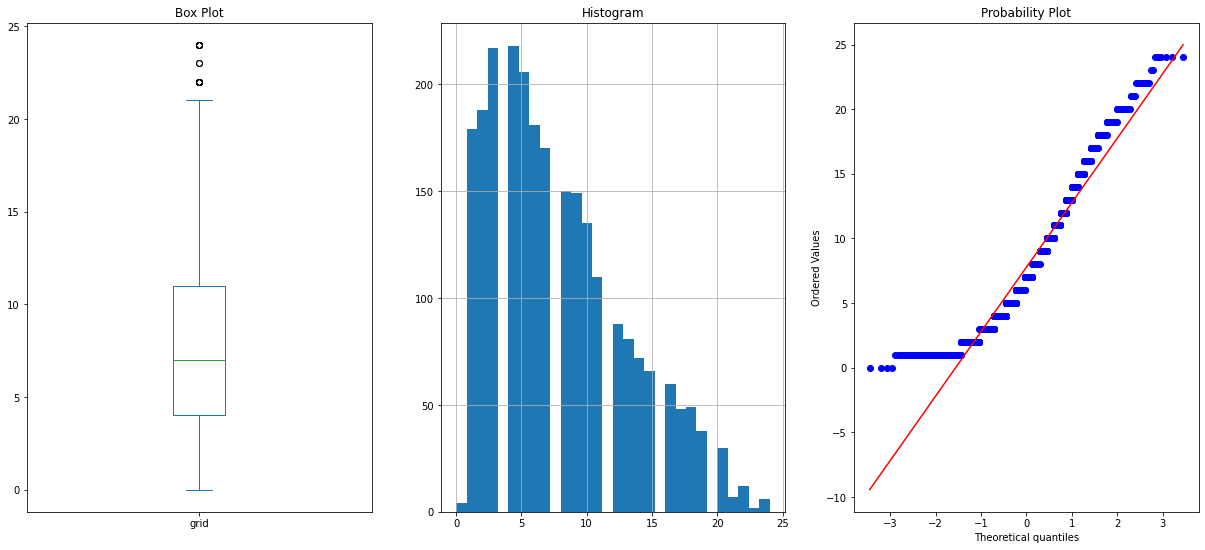

In [52]:
#Indentifying grid position
#Using Box Plots, Histogram and Q-Q Plot
diagnostic_plots(merged_na_df,'grid')

### 5.2 Diagnostic plot for Milleseconds<a name="step5.2"></a>

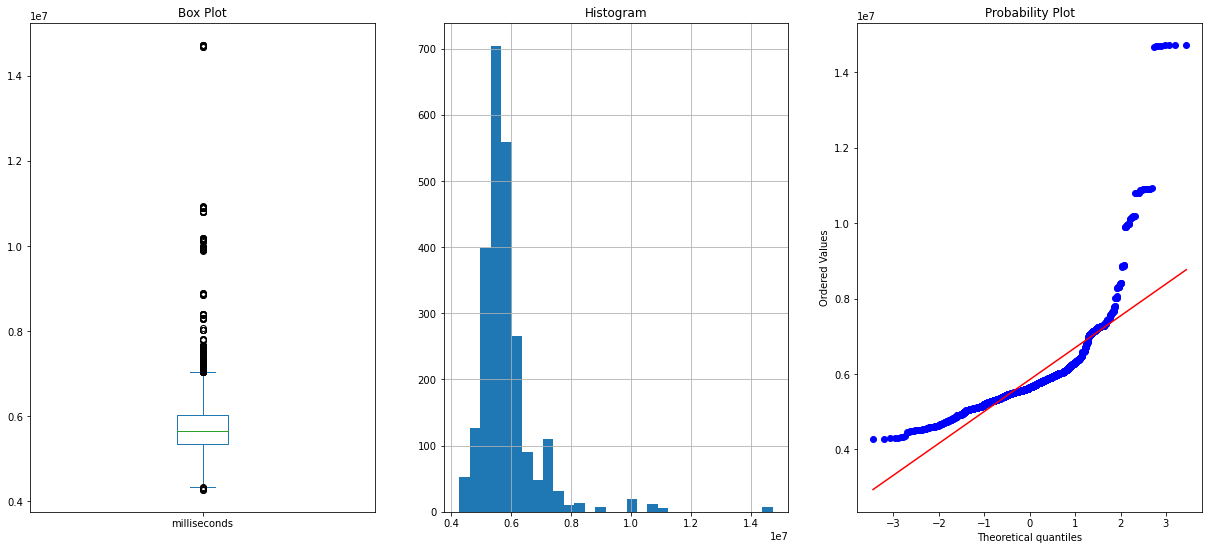

In [53]:
#Indentifying Milleseconds
#Using Box Plots, Histogram and Q-Q Plot
diagnostic_plots(merged_na_df,'milliseconds')

### 5.3 Diagnostic plot for PositionOrder<a name="step5.3"></a>

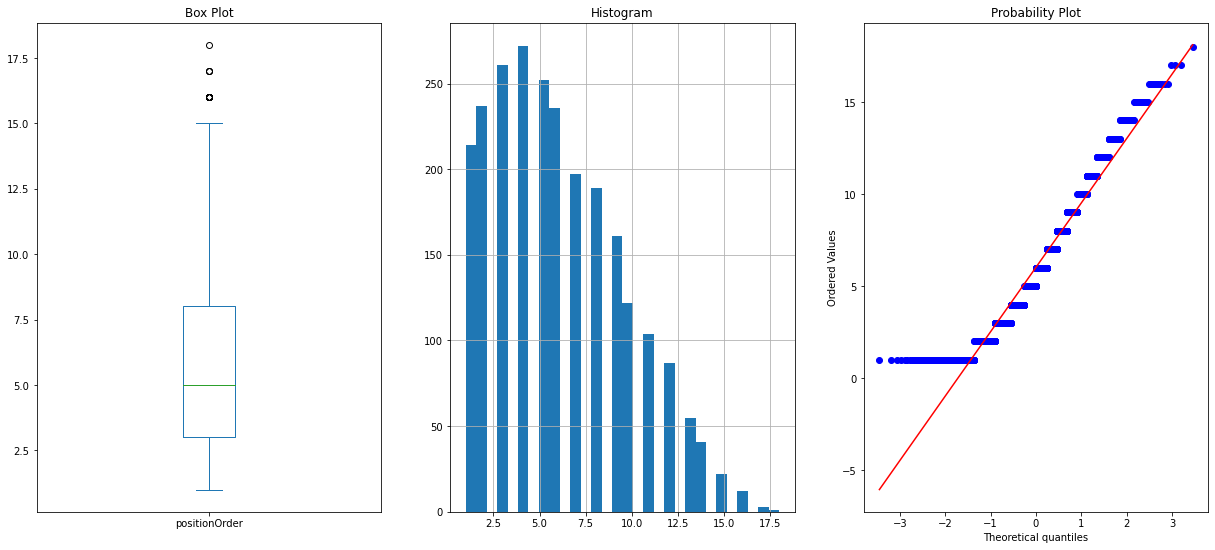

In [54]:
#Indentifying Milleseconds
#Using Box Plots, Histogram and Q-Q Plot
diagnostic_plots(merged_na_df,'positionOrder')

### 5.4 Diagnostic plot for Fastest Lap Time<a name="step5.4"></a>

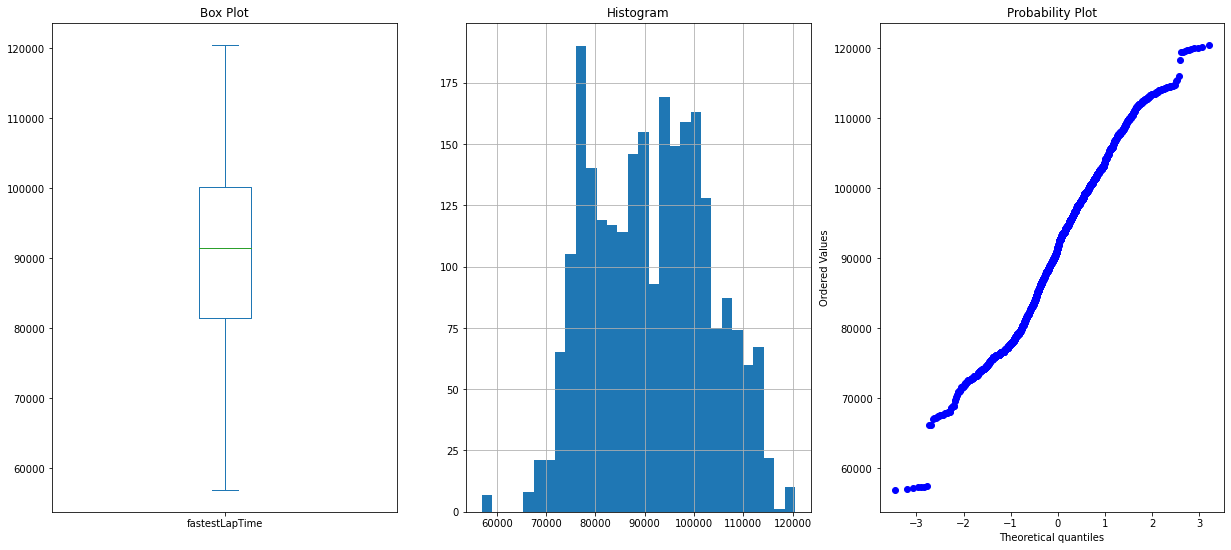

In [55]:
#Indentifying Fastest Lap Time
#Using Box Plots, Histogram and Q-Q Plot
diagnostic_plots(merged_na_df,'fastestLapTime')

### 5.5 Diagnostic plot for Fastest Lap Speed<a name="step5.5"></a>

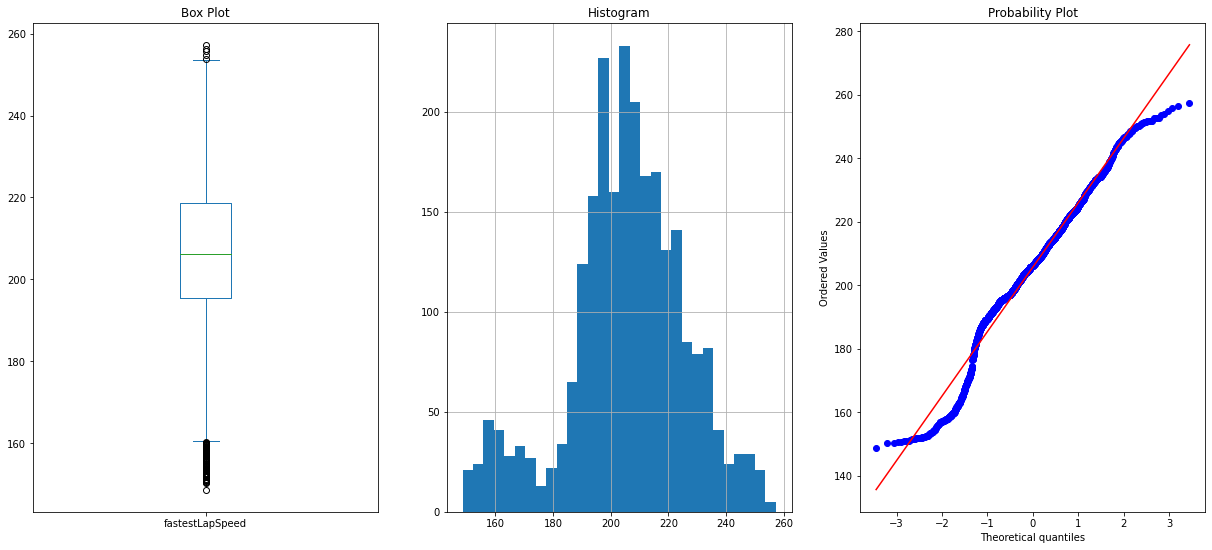

In [56]:
#Indentifying Fastest Lap Speed
#Using Box Plots, Histogram and Q-Q Plot
diagnostic_plots(merged_na_df,'fastestLapSpeed')

### 5.6 Diagnostic plot for Points<a name="step5.6"></a>

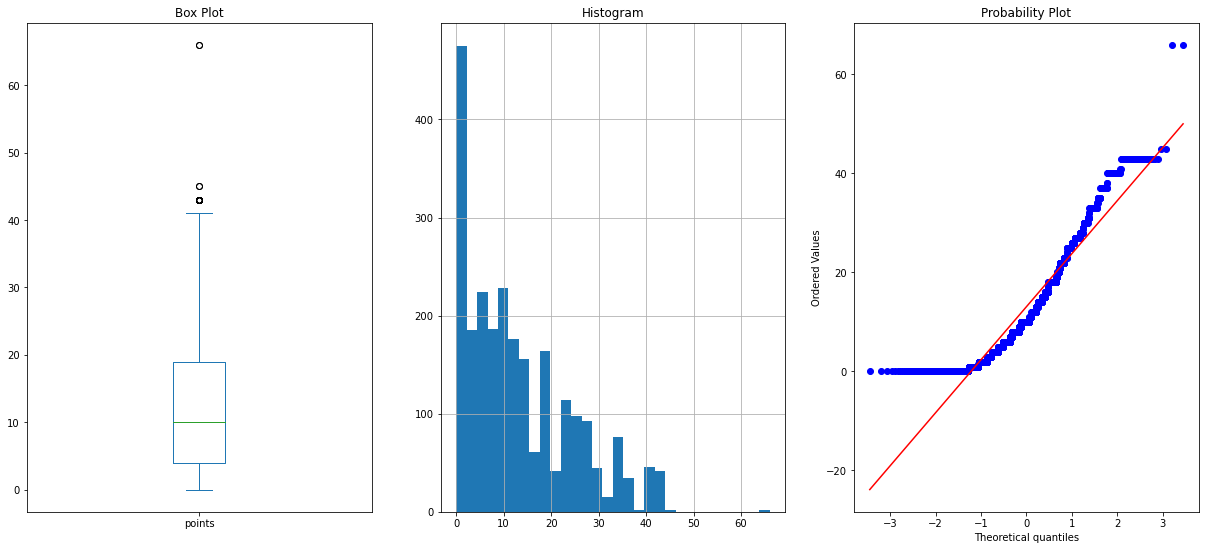

In [57]:
#Indentifying Points
#Using Box Plots, Histogram and Q-Q Plot
diagnostic_plots(merged_na_df,'points')

### 5.7 Diagnostic plot for Wins<a name="step5.7"></a>

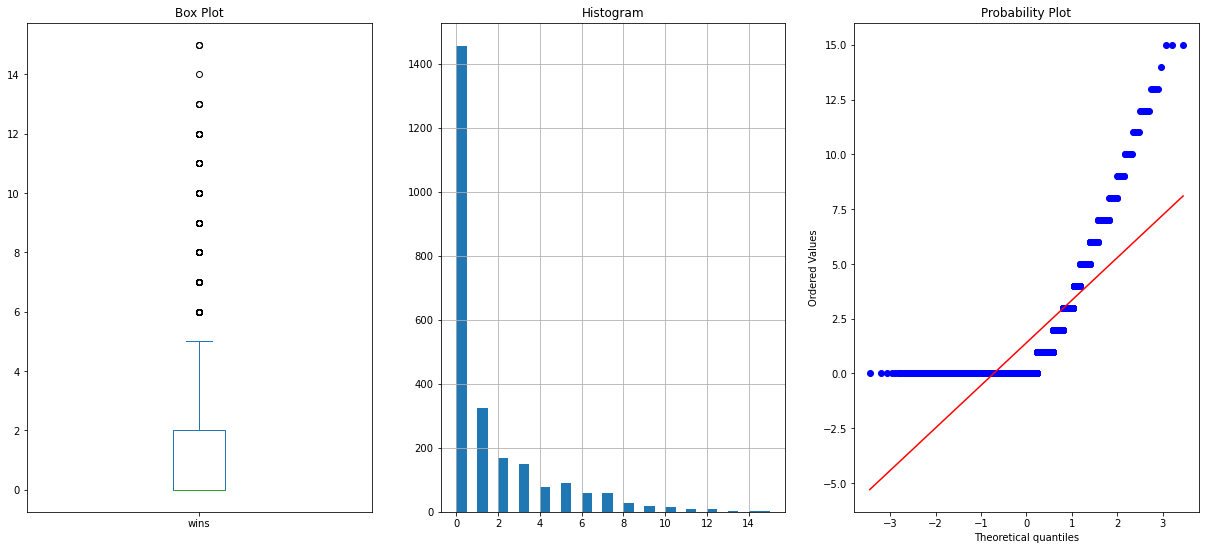

In [58]:
#Indentifying Points
#Using Box Plots, Histogram and Q-Q Plot
diagnostic_plots(merged_na_df,'wins')

# 6. Dealing with Outliers by capping<a name="step6"></a>
<a href="#top">Back to Table of contents</a>


### 6.1 Before Capping<a name="step6.1"></a>

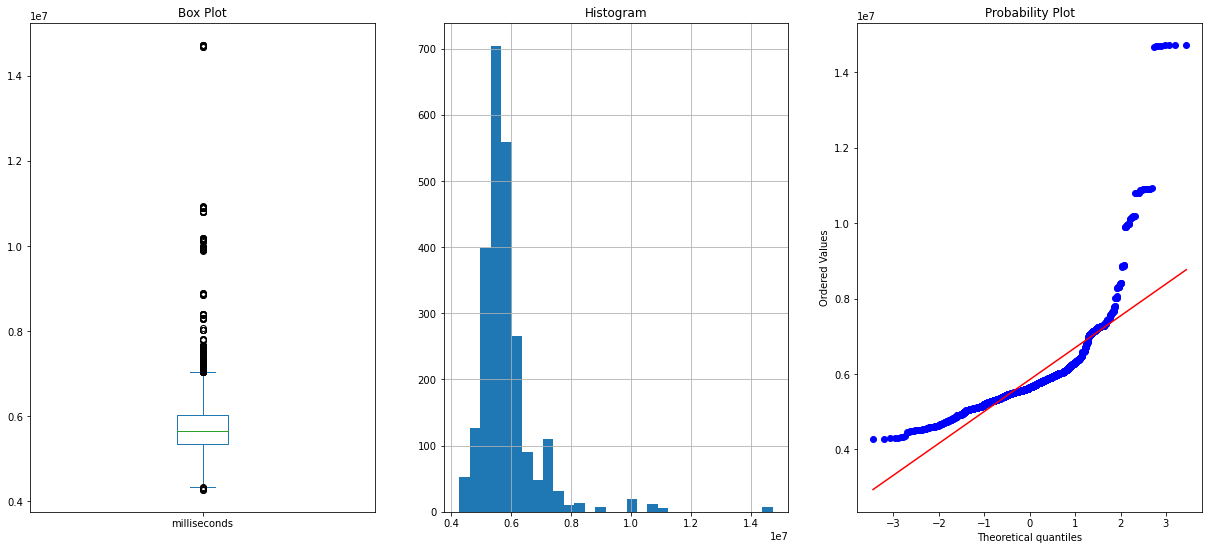

In [59]:
# let's explore the variables before capping
diagnostic_plots(merged_na_df, 'milliseconds')

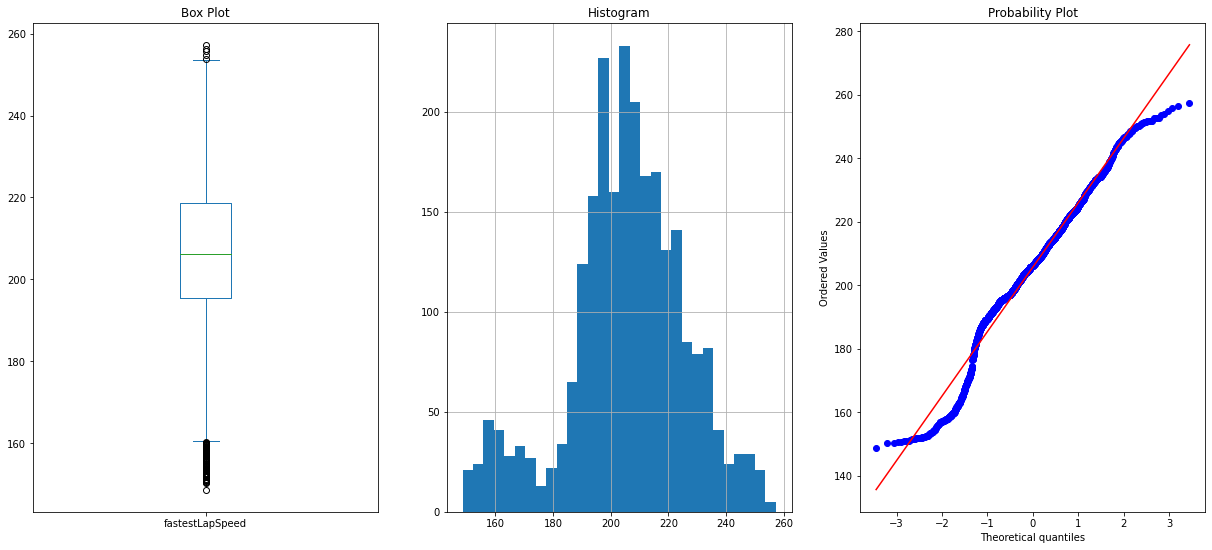

In [60]:
diagnostic_plots(merged_na_df, 'fastestLapSpeed')

In [61]:
# create the capper
windsorizer = Winsorizer(capping_method ='gaussian', 
                        tail='both', # cap left, right or both tails
                        fold = 2, #recommended value
                        variables=['milliseconds','fastestLapSpeed'])

windsorizer.fit(merged_na_df)

Winsorizer(fold=2, tail='both', variables=['milliseconds', 'fastestLapSpeed'])

In [62]:
t_merged_df = windsorizer.transform(merged_na_df)

### 6.2 After Capping<a name="step6.2"></a>

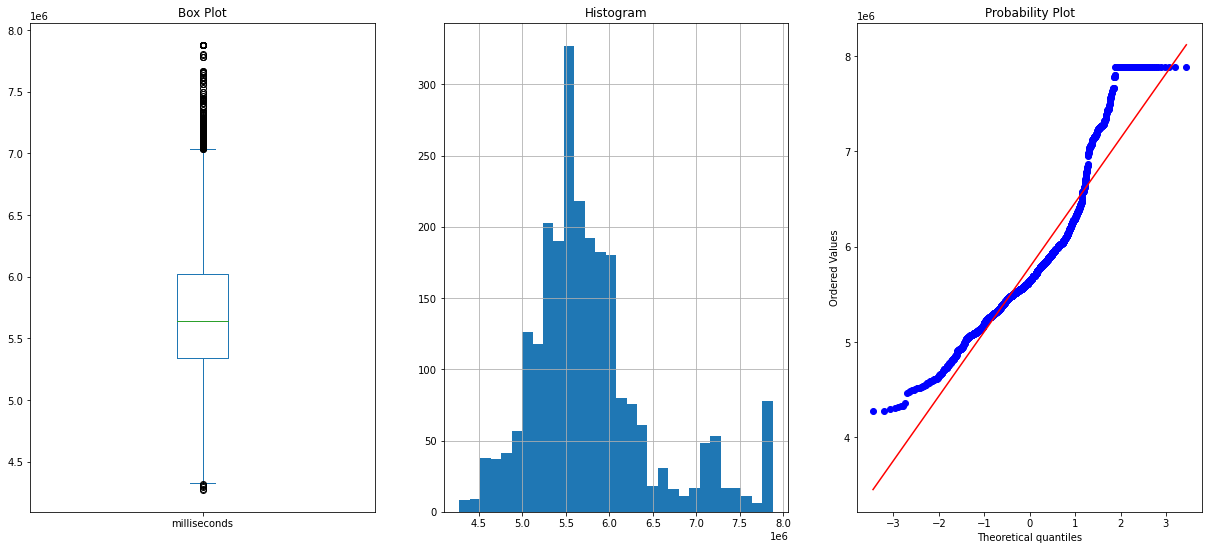

In [63]:
# let's explore the variables before capping
diagnostic_plots(t_merged_df, 'milliseconds')

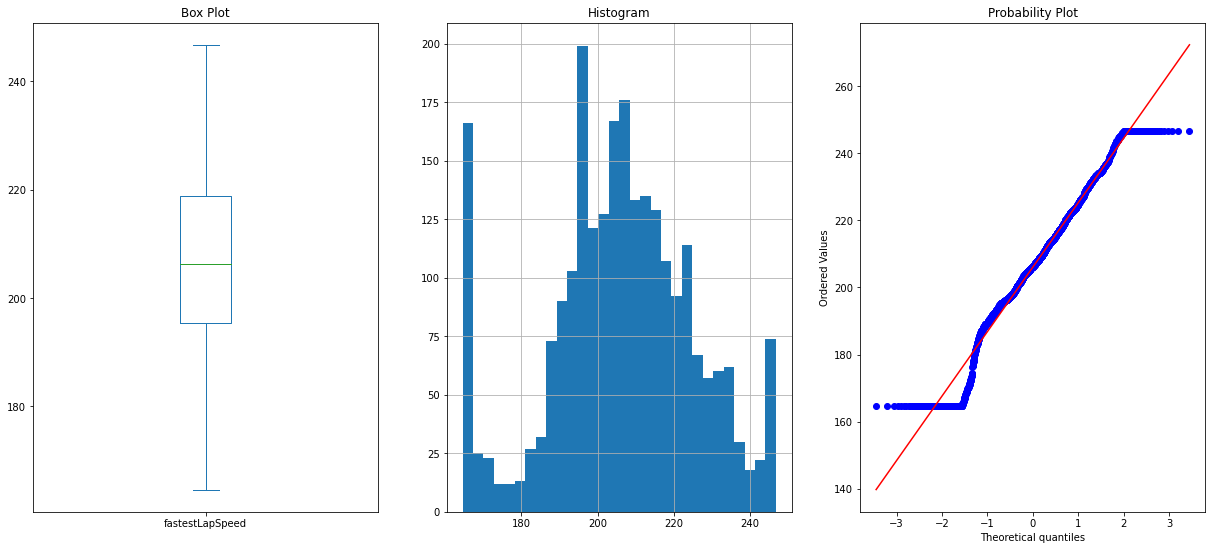

In [64]:
diagnostic_plots(t_merged_df, 'fastestLapSpeed')

#### Choosing between capping, removing and not doing anything with the outliers, I feel that capping would be the most appropriate for the outliers as it would cause the extreme values to still be considered as valuable data when using it for prediction. Hence as we keep all the extreme values closer to the centre value, we will be able to predict more accurately as there is lesser data being compromised.

# 7 Numerical Variables Transformations<a name="step7"></a>
<a href="#top">Back to Table of contents</a>

### 7.1 Log Transformation<a name="step7.1"></a>

### Milliseconds

In [65]:
'''
# initialize the transformer
lt = LogTransformer(variables=['milliseconds','fastestLapSpeed'])

# fit transformer to data set
lt.fit(t_merged_df)

# transform variables within our data set
t_merged_df = lt.transform(t_merged_df)
diagnostic_plots(t_merged_df, 'milliseconds')
'''

"\n# initialize the transformer\nlt = LogTransformer(variables=['milliseconds','fastestLapSpeed'])\n\n# fit transformer to data set\nlt.fit(t_merged_df)\n\n# transform variables within our data set\nt_merged_df = lt.transform(t_merged_df)\ndiagnostic_plots(t_merged_df, 'milliseconds')\n"

### Fastest Lap Speed

In [66]:
#diagnostic_plots(t_merged_df, 'fastestLapSpeed')

### 7.2 Reciprocal Transformation<a name="step7.2"></a>

### Milliseconds

In [67]:
'''
# initialize the transformer
rt = ReciprocalTransformer(variables = ['milliseconds','fastestLapSpeed'])

# fit transformer to the entire dataframe
rt.fit(t_merged_df)

# transform the indicated variables within our data set
t_merged_df = rt.transform(t_merged_df)
diagnostic_plots(t_merged_df, 'milliseconds')
'''

"\n# initialize the transformer\nrt = ReciprocalTransformer(variables = ['milliseconds','fastestLapSpeed'])\n\n# fit transformer to the entire dataframe\nrt.fit(t_merged_df)\n\n# transform the indicated variables within our data set\nt_merged_df = rt.transform(t_merged_df)\ndiagnostic_plots(t_merged_df, 'milliseconds')\n"

### Fastest Lap Speed

In [68]:
#diagnostic_plots(t_merged_df, 'fastestLapSpeed')

### 7.3 Cube Root Transformation<a name="step7.3"></a>

In [69]:
'''
# set up PowerTransformer with the square root exponent
et = PowerTransformer(variables = ['milliseconds','fastestLapSpeed'], exp=1/3) # for cube root

# fit transformer to data 
et.fit(t_merged_df)

# transform indicated variables in the dataset
t_merged_df = et.transform(t_merged_df)
diagnostic_plots(t_merged_df, 'milliseconds')
'''

"\n# set up PowerTransformer with the square root exponent\net = PowerTransformer(variables = ['milliseconds','fastestLapSpeed'], exp=1/3) # for cube root\n\n# fit transformer to data \net.fit(t_merged_df)\n\n# transform indicated variables in the dataset\nt_merged_df = et.transform(t_merged_df)\ndiagnostic_plots(t_merged_df, 'milliseconds')\n"

### Fastest Lap Speed

In [70]:
#diagnostic_plots(t_merged_df, 'fastestLapSpeed')

### 7.4 Power Transformation<a name="step7.4"></a>

### Milliseconds

In [71]:
'''
# initialize the transformer with the variables to transform and 
# the desired exponent

et = PowerTransformer(variables = ['milliseconds','fastestLapSpeed'], exp=0.3)

# fit transformer to data
et.fit(t_merged_df)
# transform indicated variables in the dataset
t_merged_df = et.transform(t_merged_df)
diagnostic_plots(t_merged_df, 'milliseconds')
'''

"\n# initialize the transformer with the variables to transform and \n# the desired exponent\n\net = PowerTransformer(variables = ['milliseconds','fastestLapSpeed'], exp=0.3)\n\n# fit transformer to data\net.fit(t_merged_df)\n# transform indicated variables in the dataset\nt_merged_df = et.transform(t_merged_df)\ndiagnostic_plots(t_merged_df, 'milliseconds')\n"

### Fastest Lap Speed

In [72]:
#diagnostic_plots(t_merged_df, 'fastestLapSpeed')

### 7.5 Box Cox Transformation<a name="step7.5"></a>

### Milliseconds

In [73]:
'''
# initialize the transformer with a group of variables to transform
bct = BoxCoxTransformer(variables = ['milliseconds','fastestLapSpeed'])

# fit transformer to the data set
bct.fit(t_merged_df)

# transform indicated variables in the dataset
t_merged_df = bct.transform(t_merged_df)
diagnostic_plots(t_merged_df, 'milliseconds')
'''

"\n# initialize the transformer with a group of variables to transform\nbct = BoxCoxTransformer(variables = ['milliseconds','fastestLapSpeed'])\n\n# fit transformer to the data set\nbct.fit(t_merged_df)\n\n# transform indicated variables in the dataset\nt_merged_df = bct.transform(t_merged_df)\ndiagnostic_plots(t_merged_df, 'milliseconds')\n"

### Fastest Lap Speed

In [74]:
#diagnostic_plots(t_merged_df, 'fastestLapSpeed')

### 7.6 Yeo Johnson Transformation<a name="step7.6"></a>

### Milliseconds

In [75]:
'''
# initialize the transformer with a subset of variables to transform
yjt = YeoJohnsonTransformer(variables = ['milliseconds','fastestLapSpeed'])

# fit transformer to the dataframe
yjt.fit(t_merged_df)

# transform indicated variables

t_merged_df = yjt.transform(t_merged_df)

diagnostic_plots(t_merged_df, 'milliseconds')
'''

"\n# initialize the transformer with a subset of variables to transform\nyjt = YeoJohnsonTransformer(variables = ['milliseconds','fastestLapSpeed'])\n\n# fit transformer to the dataframe\nyjt.fit(t_merged_df)\n\n# transform indicated variables\n\nt_merged_df = yjt.transform(t_merged_df)\n\ndiagnostic_plots(t_merged_df, 'milliseconds')\n"

### Fastest Lap Speed

In [76]:
#diagnostic_plots(t_merged_df, 'fastestLapSpeed')

### After having Milliseconds and fastestLapSpeed go through each transformation respectively, We can see that Milliseconds would be best suited for reciprocal transformation while FastestLapSpeed would be suited for Log Transformation

### 7.7 Final Chosen Transformations<a name="step7.7"></a>
### Milliseconds: Reciprocal Transformation


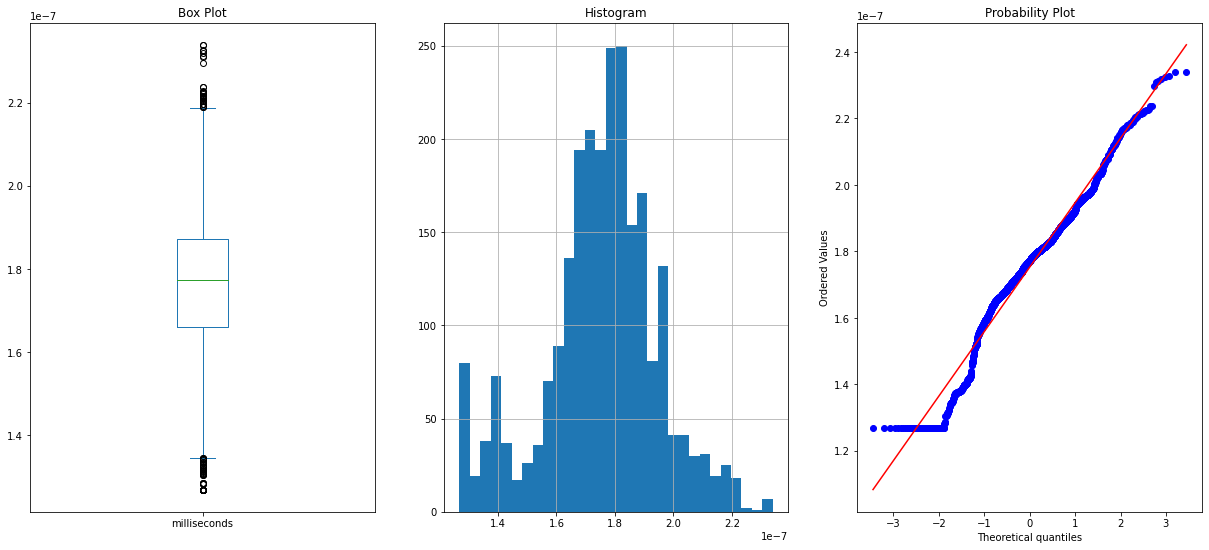

In [77]:

# initialize the transformer
rt = ReciprocalTransformer(variables = ['milliseconds'])

# fit transformer to the entire dataframe
rt.fit(t_merged_df)

# transform the indicated variables within our data set
t_merged_df = rt.transform(t_merged_df)
diagnostic_plots(t_merged_df, 'milliseconds')


### FastestLapSpeed: Yeo Johnson Transformation

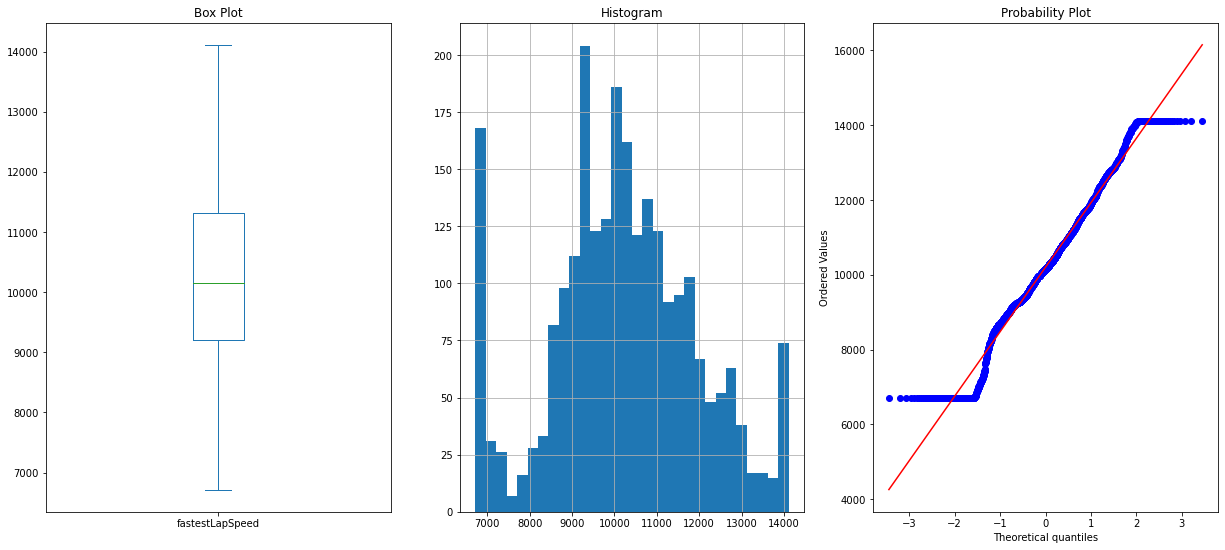

In [78]:

# initialize the transformer with a subset of variables to transform
yjt = YeoJohnsonTransformer(variables = ['fastestLapSpeed'])

# fit transformer to the dataframe
yjt.fit(t_merged_df)

# transform indicated variables

t_merged_df = yjt.transform(t_merged_df)

diagnostic_plots(t_merged_df, 'fastestLapSpeed')


# 8. Train Test Split<a name="step8"></a>
<a href="#top">Back to Table of contents</a>

In [79]:
# The target variable is "positionOrder" splitting train (70%) and test (30%)

X_train, X_test, y_train, y_test = train_test_split(
    t_merged_df.drop('positionOrder', axis=1), t_merged_df['positionOrder'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((1726, 9), (740, 9))

In [80]:
y_train.shape, y_test.shape

((1726,), (740,))

In [81]:
X_train.isnull().mean().sort_values(ascending= False) #Check missing value 
#Since fastestLapTime is the only numerical variable that has missing value, we only need to do numerical variable imputation

fastestLapTime     0.000579
constructorId      0.000000
name               0.000000
raceId             0.000000
grid               0.000000
milliseconds       0.000000
fastestLapSpeed    0.000000
points             0.000000
wins               0.000000
dtype: float64

# 9. Numerical variable imputation<a name="step9"></a>
<a href="#top">Back to Table of contents</a>

### 9.1 Mean Median imputation<a name="step9.1"></a>

In [82]:

# Item_Weight Mean imputation
# let's create a mean imputer
#Configuration step for imputer
mean_imputer = MeanMedianImputer(imputation_method='mean',
                                   variables=['fastestLapTime'])

mean_imputer.fit(X_train)
mean_imputer.imputer_dict_
# transform the data
X_train = mean_imputer.transform(X_train)
X_test = mean_imputer.transform(X_test)

#Check missing value for fastestLapTime after imputation
X_train.isnull().mean().sort_values(ascending= False)


constructorId      0.0
name               0.0
raceId             0.0
grid               0.0
milliseconds       0.0
fastestLapTime     0.0
fastestLapSpeed    0.0
points             0.0
wins               0.0
dtype: float64

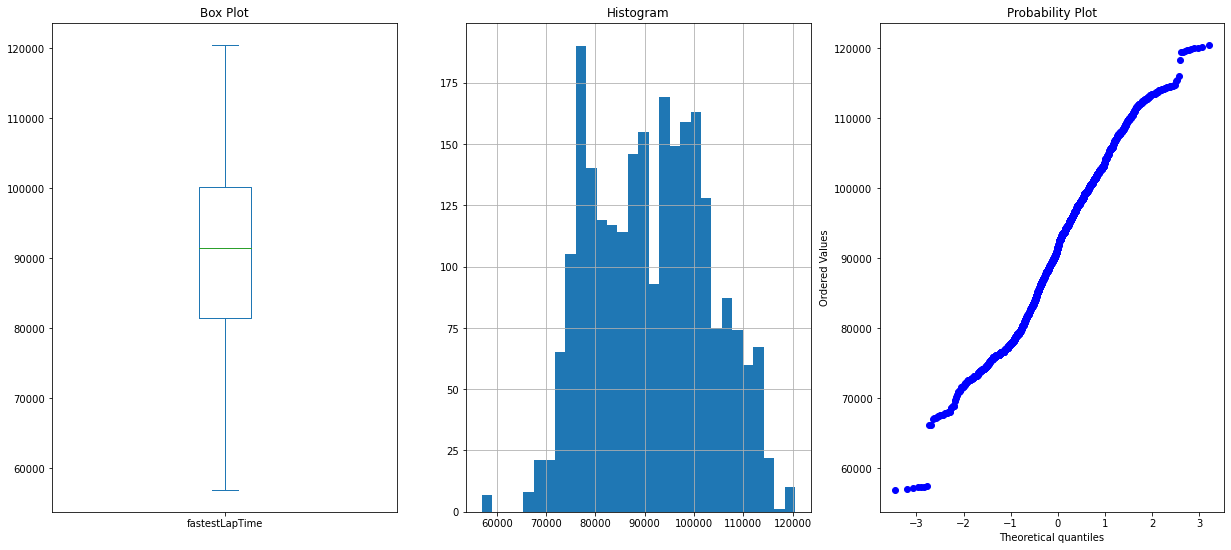

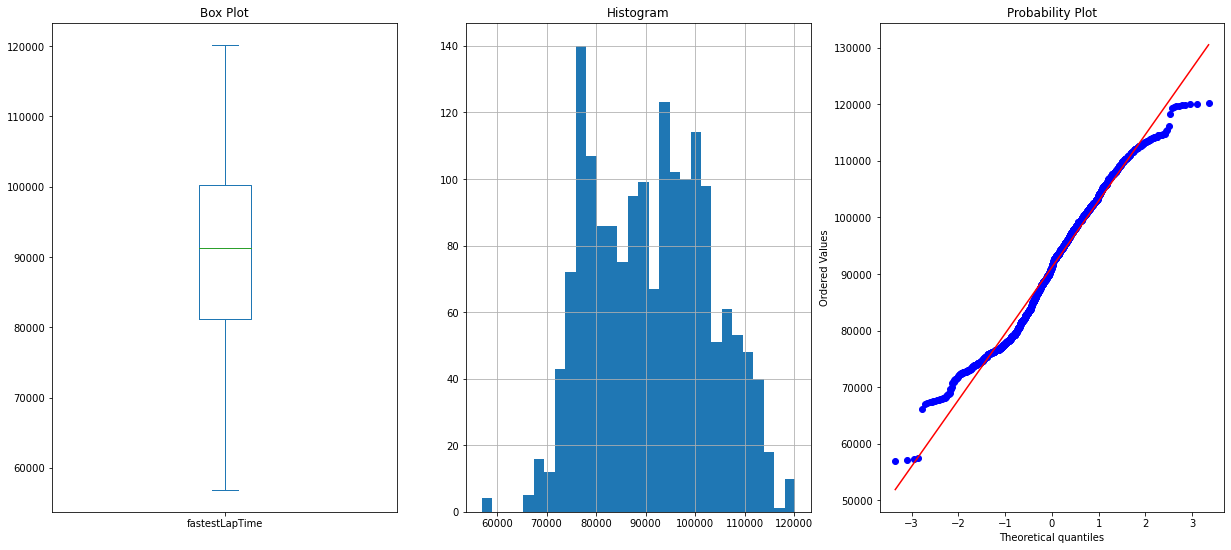

In [83]:
#Before
diagnostic_plots(t_merged_df,'fastestLapTime')
#After
diagnostic_plots(X_train,'fastestLapTime')

### 9.2 Arbitrary value of -1 replacement<a name="step9.2"></a>

In [84]:
'''
# let's create an arbitrary value imputer

imputer = ArbitraryNumberImputer(
    arbitrary_number=-1, variables=['fastestLapTime'])

imputer.fit(X_train)
# dictionary with the mappings for each variable
imputer.arbitrary_number
# transform the data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# check that null values were replaced
X_train[['fastestLapTime']].isnull().mean()

#After
diagnostic_plots(X_train,'fastestLapTime')
#There is alot of values on the left side, there is a gap in the histogram
'''

"\n# let's create an arbitrary value imputer\n\nimputer = ArbitraryNumberImputer(\n    arbitrary_number=-1, variables=['fastestLapTime'])\n\nimputer.fit(X_train)\n# dictionary with the mappings for each variable\nimputer.arbitrary_number\n# transform the data\nX_train = imputer.transform(X_train)\nX_test = imputer.transform(X_test)\n\n# check that null values were replaced\nX_train[['fastestLapTime']].isnull().mean()\n\n#After\ndiagnostic_plots(X_train,'fastestLapTime')\n#There is alot of values on the left side, there is a gap in the histogram\n"

### 9.3 Replacing missing values by a value at the end of the distribution <a name="step9.3"></a>

In [85]:
'''
# let's create a median imputer

# IQR limits -> right tail -> Q3 + 1.5*IQR
imputer = EndTailImputer(imputation_method='iqr', tail='right',fold=1.5, 
                         variables=['fastestLapTime'])

imputer.fit(X_train)
# dictionary with the mappings for each variable
imputer.imputer_dict_ # Q3 + 3*IQR
# transform the data
X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)
# check that null values were replaced
X_train[['fastestLapTime']].isnull().mean()

#After
diagnostic_plots(X_train,'fastestLapTime')
'''

"\n# let's create a median imputer\n\n# IQR limits -> right tail -> Q3 + 1.5*IQR\nimputer = EndTailImputer(imputation_method='iqr', tail='right',fold=1.5, \n                         variables=['fastestLapTime'])\n\nimputer.fit(X_train)\n# dictionary with the mappings for each variable\nimputer.imputer_dict_ # Q3 + 3*IQR\n# transform the data\nX_train = imputer.transform(X_train)\nX_test = imputer.transform(X_test)\n# check that null values were replaced\nX_train[['fastestLapTime']].isnull().mean()\n\n#After\ndiagnostic_plots(X_train,'fastestLapTime')\n"

### 9.4 Add Missing indicator imputation<a name="step9.4"></a>

In [86]:
'''
imputer = AddMissingIndicator()

imputer.fit(X_train)

# transform the data - replace the missing values

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# check that null values were replaced
X_train.isnull().mean()

# check that null values were replaced
X_train.head()
#Not really useful
diagnostic_plots(X_train,'fastestLapTime')
'''

"\nimputer = AddMissingIndicator()\n\nimputer.fit(X_train)\n\n# transform the data - replace the missing values\n\nX_train = imputer.transform(X_train)\nX_test = imputer.transform(X_test)\n\n# check that null values were replaced\nX_train.isnull().mean()\n\n# check that null values were replaced\nX_train.head()\n#Not really useful\ndiagnostic_plots(X_train,'fastestLapTime')\n"

###  9.5 Random sample imputation<a name="step9.5"></a>

In [87]:
'''
# let's create a random sample imputer
# Works for Categorical Data too

imputer = RandomSampleImputer(variables=['fastestLapTime'])

imputer.fit(X_train)

# transform the data - replace the missing values

X_train = imputer.transform(X_train)
X_test = imputer.transform(X_test)

# check that null values were replaced
#X_train.isnull().mean()
diagnostic_plots(X_train,'fastestLapTime')
'''

"\n# let's create a random sample imputer\n# Works for Categorical Data too\n\nimputer = RandomSampleImputer(variables=['fastestLapTime'])\n\nimputer.fit(X_train)\n\n# transform the data - replace the missing values\n\nX_train = imputer.transform(X_train)\nX_test = imputer.transform(X_test)\n\n# check that null values were replaced\n#X_train.isnull().mean()\ndiagnostic_plots(X_train,'fastestLapTime')\n"

# 10. Categorical Data Encoding <a name="step10"></a>
<a href="#top">Back to Table of contents</a>

In [88]:
# make a list with the categorical variables
X_train['constructorId'] = X_train['constructorId'].astype('category')
X_train['name'] = X_train['name'].astype('category')
X_train['raceId'] = X_train['raceId'].astype('category')
X_test['constructorId'] = X_test['constructorId'].astype('category')
X_test['name'] = X_test['name'].astype('category')
X_test['raceId'] = X_test['raceId'].astype('category')

In [89]:
X_train.info()
vars_categorical = ['constructorId','name','raceId']
X_train.isnull().mean() #Check for any missing values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1726 entries, 4408 to 6682
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   constructorId    1726 non-null   category
 1   name             1726 non-null   category
 2   raceId           1726 non-null   category
 3   grid             1726 non-null   int64   
 4   milliseconds     1726 non-null   float64 
 5   fastestLapTime   1726 non-null   float64 
 6   fastestLapSpeed  1726 non-null   float64 
 7   points           1726 non-null   float64 
 8   wins             1726 non-null   int64   
dtypes: category(3), float64(4), int64(2)
memory usage: 112.6 KB


constructorId      0.0
name               0.0
raceId             0.0
grid               0.0
milliseconds       0.0
fastestLapTime     0.0
fastestLapSpeed    0.0
points             0.0
wins               0.0
dtype: float64

### 10.1 One Hot Encoding<a name="step10.1"></a>

In [90]:
'''
# let's create the encoder
#from feature_engine.encoding import OneHotEncoder

ohe_enc = OneHotEncoder(
    top_categories=None,
    drop_last=False)  # to return k-1, false to return k
# fit the encoder to the train set: it will learn the variables and 
# categories to encode

ohe_enc.fit(X_train)
# we can see which variables the encoder will encode

ohe_enc.variables

#let's transform train and test set

X_train_enc = ohe_enc.transform(X_train)
X_test_enc = ohe_enc.transform(X_test)

# let's inspect the encoded train set

X_train_enc.head()
'''

"\n# let's create the encoder\n#from feature_engine.encoding import OneHotEncoder\n\nohe_enc = OneHotEncoder(\n    top_categories=None,\n    drop_last=False)  # to return k-1, false to return k\n# fit the encoder to the train set: it will learn the variables and \n# categories to encode\n\nohe_enc.fit(X_train)\n# we can see which variables the encoder will encode\n\nohe_enc.variables\n\n#let's transform train and test set\n\nX_train_enc = ohe_enc.transform(X_train)\nX_test_enc = ohe_enc.transform(X_test)\n\n# let's inspect the encoded train set\n\nX_train_enc.head()\n"

### 10.2 One Hot Encoding for Top Categories<a name="step10.2"></a>

In [91]:

ohe_enc = OneHotEncoder(
    
    # to indicate how many top categories
    top_categories= 10,  
    
    # we can select which variables to encode
    variables=['constructorId','name'],
    
    # to indicate if we drop one of the binaries
    drop_last=False)

ohe_enc.fit(X_train)

# the encoder stores the most frequent labels per variable

ohe_enc.encoder_dict_

# let's transform train and test sets
X_train_enc = ohe_enc.transform(X_train)
X_test_enc = ohe_enc.transform(X_test)

# let's inspect the result

X_train_enc.head()


,raceId,grid,milliseconds,fastestLapTime,fastestLapSpeed,points,wins,constructorId_6,constructorId_9,constructorId_1,...,constructorId_7,name_Ferrari,name_Red Bull,name_McLaren,name_Williams,name_Renault,name_Force India,name_Toro Rosso,name_BMW Sauber,name_Toyota
4408,349,11,1.854006e-07,111600.0,12009.999311,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6611,985,5,1.770924e-07,98800.0,9673.304315,33.0,4,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4699,991,17,1.723333e-07,98400.0,9552.819910,0.0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6422,880,5,1.846492e-07,89600.0,10788.577912,30.0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
7374,855,1,1.833035e-07,96900.0,11025.959017,27.0,9,0,1,0,...,0,0,1,0,0,0,0,0,0,0


### 10.3 Replacing categories with ordinal numbers<a name="step10.3"></a>

In [92]:

'''
# let's create the encoder
# for integer encoding using feature-engine
from feature_engine.encoding import OrdinalEncoder

ordinal_enc = OrdinalEncoder(
    encoding_method='arbitrary',
    variables=vars_categorical)

# let's fit the encoder to the train and test set from One Hot Encoding of Top Category

ordinal_enc.fit(X_train)

# let's inspect which variables the encoder will encode

ordinal_enc.variables

# in the encoder dict we can observe the numbers
# assigned to each category for all the indicated variables

ordinal_enc.encoder_dict_

# let's transform the train and test sets

X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_train)
X_train.head()
'''

"\n# let's create the encoder\n# for integer encoding using feature-engine\nfrom feature_engine.encoding import OrdinalEncoder\n\nordinal_enc = OrdinalEncoder(\n    encoding_method='arbitrary',\n    variables=vars_categorical)\n\n# let's fit the encoder to the train and test set from One Hot Encoding of Top Category\n\nordinal_enc.fit(X_train)\n\n# let's inspect which variables the encoder will encode\n\nordinal_enc.variables\n\n# in the encoder dict we can observe the numbers\n# assigned to each category for all the indicated variables\n\nordinal_enc.encoder_dict_\n\n# let's transform the train and test sets\n\nX_train = ordinal_enc.transform(X_train)\nX_test = ordinal_enc.transform(X_train)\nX_train.head()\n"

### 10.4 Replacing categories with counts or frequency of observations<a name="step10.4"></a>

In [93]:
'''
# let's create an encoder

count_enc = CountFrequencyEncoder(
    encoding_method='count', # to do frequency ==> encoding_method='frequency'
    variables = vars_categorical)

# fit the encoder to the train set
count_enc.fit(X_train)

# the encoder stores the variables it will encode

count_enc.variables

# in the encoder dict contains the counts or frequencies
# per category per variable

count_enc.encoder_dict_

# let's transform train and test sets

X_train_enc = count_enc.transform(X_train)
X_test_enc = count_enc.transform(X_train)

# let's inspect the result

X_train_enc.head()
'''

"\n# let's create an encoder\n\ncount_enc = CountFrequencyEncoder(\n    encoding_method='count', # to do frequency ==> encoding_method='frequency'\n    variables = vars_categorical)\n\n# fit the encoder to the train set\ncount_enc.fit(X_train)\n\n# the encoder stores the variables it will encode\n\ncount_enc.variables\n\n# in the encoder dict contains the counts or frequencies\n# per category per variable\n\ncount_enc.encoder_dict_\n\n# let's transform train and test sets\n\nX_train_enc = count_enc.transform(X_train)\nX_test_enc = count_enc.transform(X_train)\n\n# let's inspect the result\n\nX_train_enc.head()\n"

### 10.5 Ordered Ordinal Encoding<a name="step10.5"></a>

In [94]:
'''
# let's create the encoder
ordinal_enc = OrdinalEncoder(
    encoding_method='ordered')

# when fitting the transformer, we need to pass the target as well
ordinal_enc.fit(X_train,y_train)

# the encoder stores the variables it will encode
count_enc.variables
# in the encoder dict we can observe the numbers that will
#replace each category in each variable

ordinal_enc.encoder_dict_
# let's transform train and test sets

X_train_enc = ordinal_enc.transform(X_train)
X_test_enc = ordinal_enc.transform(X_test)

X_train_enc.head()
'''


"\n# let's create the encoder\nordinal_enc = OrdinalEncoder(\n    encoding_method='ordered')\n\n# when fitting the transformer, we need to pass the target as well\nordinal_enc.fit(X_train,y_train)\n\n# the encoder stores the variables it will encode\ncount_enc.variables\n# in the encoder dict we can observe the numbers that will\n#replace each category in each variable\n\nordinal_enc.encoder_dict_\n# let's transform train and test sets\n\nX_train_enc = ordinal_enc.transform(X_train)\nX_test_enc = ordinal_enc.transform(X_test)\n\nX_train_enc.head()\n"

### 10.6 Target Mean Encoding<a name="step10.6"></a>

In [95]:
'''
# let's create the encoder

mean_enc = MeanEncoder(variables=None)

# when fitting the transformer, we need to pass the target as well
mean_enc.fit(X_train, y_train)
# variables that will be encoded
mean_enc.variables
# in the encoder dict we can observe the target mean per category per variable
mean_enc.encoder_dict_
# let's transform train and test sets

X_train_enc = count_enc.transform(X_train)
X_test_enc = count_enc.transform(X_test)
X_train_enc.head()
'''

"\n# let's create the encoder\n\nmean_enc = MeanEncoder(variables=None)\n\n# when fitting the transformer, we need to pass the target as well\nmean_enc.fit(X_train, y_train)\n# variables that will be encoded\nmean_enc.variables\n# in the encoder dict we can observe the target mean per category per variable\nmean_enc.encoder_dict_\n# let's transform train and test sets\n\nX_train_enc = count_enc.transform(X_train)\nX_test_enc = count_enc.transform(X_test)\nX_train_enc.head()\n"

###  10.7 Rare Category Encoder<a name="step10.7"></a>

In [96]:
'''
# Rare category encoder

rare_encoder = RareLabelEncoder(tol=0.05, n_categories=4)

# let's fit the encoder to the train set
rare_encoder.fit(X_train)
# variables that will be encoded
rare_encoder.variables
# in the encoder dict we can observe the number of observations per category for each variable
rare_encoder.encoder_dict_
# let's transform the train and test sets

X_train_enc = rare_encoder.transform(X_train)
X_test_enc = rare_encoder.transform(X_test)
X_train_enc.head()
'''

"\n# Rare category encoder\n\nrare_encoder = RareLabelEncoder(tol=0.05, n_categories=4)\n\n# let's fit the encoder to the train set\nrare_encoder.fit(X_train)\n# variables that will be encoded\nrare_encoder.variables\n# in the encoder dict we can observe the number of observations per category for each variable\nrare_encoder.encoder_dict_\n# let's transform the train and test sets\n\nX_train_enc = rare_encoder.transform(X_train)\nX_test_enc = rare_encoder.transform(X_test)\nX_train_enc.head()\n"

# 11 Variable Discretization /Binning<a name="step11"></a>
<a href="#top">Back to Table of contents</a>

#### we will sort the numerical variables into bins/groups of different values and sizes
#### Such as numerical variables: milliseconds,fastestLapTime,fastestLapSpeed,points,wins           

### 11.1 Equal Width Discretization (Chosen) <a name="step11.1"></a>

In [97]:

# with feature engine we can automate the process for many variables
# in one line of code

disc = EqualWidthDiscretiser(bins= 10, variables = ['milliseconds','fastestLapTime','fastestLapSpeed','points','wins'])

disc.fit(X_train_enc)
# the limits of the intervals are stored in the binner_dict_

disc.binner_dict_

# transform train and test sets

train_t = disc.transform(X_train_enc)
test_t = disc.transform(X_test_enc)

### 11.2 Equal Frequency Discretization <a name="step11.2"></a>

In [98]:
'''
# with feature engine we can automate the process for many variables
# in one line of code

disc = EqualFrequencyDiscretiser(q=10, variables = ['milliseconds','fastestLapTime','fastestLapSpeed','points','wins'])

disc.fit(X_train_enc)
# in the binner dict, we can see the limits of the intervals
# for each variable

disc.binner_dict_
# transform train and test sets

train_t = disc.transform(X_train_enc)
test_t = disc.transform(X_test_enc)
'''

"\n# with feature engine we can automate the process for many variables\n# in one line of code\n\ndisc = EqualFrequencyDiscretiser(q=10, variables = ['milliseconds','fastestLapTime','fastestLapSpeed','points','wins'])\n\ndisc.fit(X_train_enc)\n# in the binner dict, we can see the limits of the intervals\n# for each variable\n\ndisc.binner_dict_\n# transform train and test sets\n\ntrain_t = disc.transform(X_train_enc)\ntest_t = disc.transform(X_test_enc)\n"

### Milliseconds

Text(0, 0.5, 'Number of observations per bin')

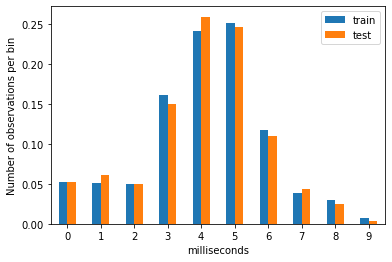

In [99]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set

# Item_Weight
# calculate proportion of observations per interval
t1 = train_t.groupby(['milliseconds'])['milliseconds'].count() / len(train_t)
t2 = test_t.groupby(['milliseconds'])['milliseconds'].count() / len(test_t)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# plot
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')


### Fastest Lap Time

Text(0, 0.5, 'Number of observations per bin')

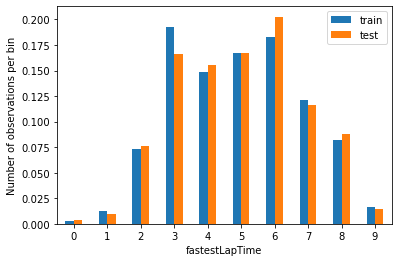

In [100]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set

# Item_Weight
# calculate proportion of observations per interval
t1 = train_t.groupby(['fastestLapTime'])['fastestLapTime'].count() / len(train_t)
t2 = test_t.groupby(['fastestLapTime'])['fastestLapTime'].count() / len(test_t)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# plot
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')


### Fastest Lap Speed

Text(0, 0.5, 'Number of observations per bin')

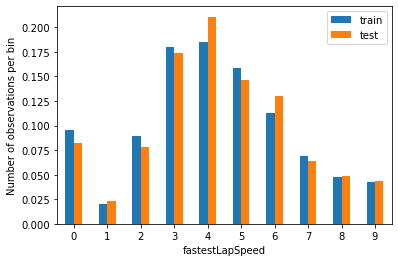

In [101]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set

# Item_Weight
# calculate proportion of observations per interval
t1 = train_t.groupby(['fastestLapSpeed'])['fastestLapSpeed'].count() / len(train_t)
t2 = test_t.groupby(['fastestLapSpeed'])['fastestLapSpeed'].count() / len(test_t)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# plot
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')


### Points

Text(0, 0.5, 'Number of observations per bin')

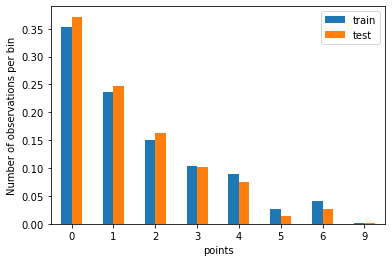

In [102]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set

# Item_Weight
# calculate proportion of observations per interval
t1 = train_t.groupby(['points'])['points'].count() / len(train_t)
t2 = test_t.groupby(['points'])['points'].count() / len(test_t)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# plot
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')


### Wins

Text(0, 0.5, 'Number of observations per bin')

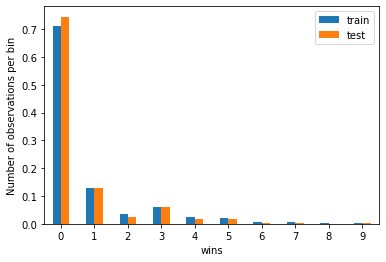

In [103]:
# if the distributions in train and test set are similar, we should expect similar propotion of
# observations in the different intervals in the train and test set

# Item_Weight
# calculate proportion of observations per interval
t1 = train_t.groupby(['wins'])['wins'].count() / len(train_t)
t2 = test_t.groupby(['wins'])['wins'].count() / len(test_t)

# concatenate aggregated views
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']

# plot
tmp.plot.bar()
plt.xticks(rotation=0)
plt.ylabel('Number of observations per bin')


## 11.3 Discretization plus categorical encoding<a name="step11.3"></a>

In [104]:
'''
# with feature engine we can automate the process for many variables
# in one line of code

disc = EqualFrequencyDiscretiser(
    q=10, variables=['milliseconds','fastestLapTime','fastestLapSpeed','points','wins'], return_object=True)

disc.fit(X_train)


# transform train and test

train_t = disc.transform(X_train)
test_t = disc.transform(X_test)

train_t[['milliseconds','fastestLapTime','fastestLapSpeed','points','wins']]

# let's order the bins

enc = OrdinalEncoder(encoding_method = 'ordered')

enc.fit(train_t, y_train)
'''

"\n# with feature engine we can automate the process for many variables\n# in one line of code\n\ndisc = EqualFrequencyDiscretiser(\n    q=10, variables=['milliseconds','fastestLapTime','fastestLapSpeed','points','wins'], return_object=True)\n\ndisc.fit(X_train)\n\n\n# transform train and test\n\ntrain_t = disc.transform(X_train)\ntest_t = disc.transform(X_test)\n\ntrain_t[['milliseconds','fastestLapTime','fastestLapSpeed','points','wins']]\n\n# let's order the bins\n\nenc = OrdinalEncoder(encoding_method = 'ordered')\n\nenc.fit(train_t, y_train)\n"

In [105]:
'''
# let's explore if the bins have a linear relationship
# with the target: we see they don't

pd.concat([train_t, y_train], axis=1).groupby('milliseconds')['positionOrder'].mean().plot()
plt.ylabel('positionOrder')
'''

"\n# let's explore if the bins have a linear relationship\n# with the target: we see they don't\n\npd.concat([train_t, y_train], axis=1).groupby('milliseconds')['positionOrder'].mean().plot()\nplt.ylabel('positionOrder')\n"

In [106]:
'''
# let's explore if the bins have a linear relationship
# with the target: we can see that the longer the lap time, the higher the position

pd.concat([train_t, y_train], axis=1).groupby('fastestLapTime')['positionOrder'].mean().plot()
plt.ylabel('positionOrder')
'''

"\n# let's explore if the bins have a linear relationship\n# with the target: we can see that the longer the lap time, the higher the position\n\npd.concat([train_t, y_train], axis=1).groupby('fastestLapTime')['positionOrder'].mean().plot()\nplt.ylabel('positionOrder')\n"

In [107]:
'''
# let's explore if the bins have a linear relationship
# with the target: we see they don't

pd.concat([train_t, y_train], axis=1).groupby('fastestLapSpeed')['positionOrder'].mean().plot()
plt.ylabel('positionOrder')
'''

"\n# let's explore if the bins have a linear relationship\n# with the target: we see they don't\n\npd.concat([train_t, y_train], axis=1).groupby('fastestLapSpeed')['positionOrder'].mean().plot()\nplt.ylabel('positionOrder')\n"

In [108]:
'''
# let's explore if the bins have a linear relationship
# with the target: We can see that the higher the points, the lower the position

pd.concat([train_t, y_train], axis=1).groupby('points')['positionOrder'].mean().plot()
plt.ylabel('positionOrder')
'''

"\n# let's explore if the bins have a linear relationship\n# with the target: We can see that the higher the points, the lower the position\n\npd.concat([train_t, y_train], axis=1).groupby('points')['positionOrder'].mean().plot()\nplt.ylabel('positionOrder')\n"

In [109]:
'''
# let's explore if the bins have a linear relationship
# with the target: We can see that the higher the number of wins, the lower the position

pd.concat([train_t, y_train], axis=1).groupby('wins')['positionOrder'].mean().plot()
plt.ylabel('positionOrder')
'''

"\n# let's explore if the bins have a linear relationship\n# with the target: We can see that the higher the number of wins, the lower the position\n\npd.concat([train_t, y_train], axis=1).groupby('wins')['positionOrder'].mean().plot()\nplt.ylabel('positionOrder')\n"

## 11.4 Arbitary interval discretization<a name="step11.4"></a>

### 11.4.1 Milliseconds<a name="step11.4.1"></a>

In [110]:
'''
# let's plot a histogram to understand the value range of 
#the variables 'milliseconds','fastestLapTime','fastestLapSpeed','points','wins'

t_merged_df['milliseconds'].hist(bins=30)
'''

"\n# let's plot a histogram to understand the value range of \n#the variables 'milliseconds','fastestLapTime','fastestLapSpeed','points','wins'\n\nt_merged_df['milliseconds'].hist(bins=30)\n"

In [111]:
'''
# bin boundaries - we will use with pandas cut()
intervals_weight = [0, 1.2e-07, 1.6e-07, 1.8e-07, 2.0e-07, np.Inf]
# 5 interval limits, you need 5 points to have 4 catagories, and it is mapped directly to the table.
# bin labels - we will use with pandas cut()

labels_weight = ['0-1.2e-07','1.2e-07-1.6e-07', '1.6e-07-1.8e-07,', '1.8e-07-2.0e-07', '>2.0e-07']
# discretize Item_Weight

# create a discretized version of the variable where the values are the
# strings we created in the previous cell
t_merged_df['milliseconds_labels'] = pd.cut(
    t_merged_df['milliseconds'], bins=intervals_weight, labels=labels_weight, include_lowest=True)

# let's create a version of the discretized variable were the values are
# the interval limits
t_merged_df['milliseconds_intervals'] = pd.cut(
    t_merged_df['milliseconds'], bins=intervals_weight, labels=None, include_lowest=True)

# plot the original and 2 versions of the discretized variable
print(t_merged_df[['milliseconds','fastestLapTime','fastestLapSpeed','points','wins']].head())
# let's check the number of observations per bin
t_merged_df['milliseconds_intervals'].value_counts()
'''

"\n# bin boundaries - we will use with pandas cut()\nintervals_weight = [0, 1.2e-07, 1.6e-07, 1.8e-07, 2.0e-07, np.Inf]\n# 5 interval limits, you need 5 points to have 4 catagories, and it is mapped directly to the table.\n# bin labels - we will use with pandas cut()\n\nlabels_weight = ['0-1.2e-07','1.2e-07-1.6e-07', '1.6e-07-1.8e-07,', '1.8e-07-2.0e-07', '>2.0e-07']\n# discretize Item_Weight\n\n# create a discretized version of the variable where the values are the\n# strings we created in the previous cell\nt_merged_df['milliseconds_labels'] = pd.cut(\n    t_merged_df['milliseconds'], bins=intervals_weight, labels=labels_weight, include_lowest=True)\n\n# let's create a version of the discretized variable were the values are\n# the interval limits\nt_merged_df['milliseconds_intervals'] = pd.cut(\n    t_merged_df['milliseconds'], bins=intervals_weight, labels=None, include_lowest=True)\n\n# plot the original and 2 versions of the discretized variable\nprint(t_merged_df[['milliseconds',

### 11.4.2 Fastest Lap Time<a name="step11.4.2"></a>

In [112]:
'''
# bin boundaries - we will use with pandas cut()
intervals_weight = [0, 87500, 90000, 92500, 95000, np.Inf]
# 5 interval limits, you need 5 points to have 4 catagories, and it is mapped directly to the table.
# bin labels - we will use with pandas cut()

labels_weight = ['0-87500','87500-90000', '90000-92500,', '92500-95000', '>95000']
# discretize Item_Weight

# create a discretized version of the variable where the values are the
# strings we created in the previous cell
t_merged_df['fastestLapTime_labels'] = pd.cut(
    t_merged_df['fastestLapTime'], bins=intervals_weight, labels=labels_weight, include_lowest=True)

# let's create a version of the discretized variable were the values are
# the interval limits
t_merged_df['fastestLapTime_intervals'] = pd.cut(
    t_merged_df['fastestLapTime'], bins=intervals_weight, labels=None, include_lowest=True)

# plot the original and 2 versions of the discretized variable
print(t_merged_df[['milliseconds','fastestLapTime','fastestLapSpeed','points','wins']].head())
# let's check the number of observations per bin
t_merged_df['fastestLapTime_intervals'].value_counts()
'''

"\n# bin boundaries - we will use with pandas cut()\nintervals_weight = [0, 87500, 90000, 92500, 95000, np.Inf]\n# 5 interval limits, you need 5 points to have 4 catagories, and it is mapped directly to the table.\n# bin labels - we will use with pandas cut()\n\nlabels_weight = ['0-87500','87500-90000', '90000-92500,', '92500-95000', '>95000']\n# discretize Item_Weight\n\n# create a discretized version of the variable where the values are the\n# strings we created in the previous cell\nt_merged_df['fastestLapTime_labels'] = pd.cut(\n    t_merged_df['fastestLapTime'], bins=intervals_weight, labels=labels_weight, include_lowest=True)\n\n# let's create a version of the discretized variable were the values are\n# the interval limits\nt_merged_df['fastestLapTime_intervals'] = pd.cut(\n    t_merged_df['fastestLapTime'], bins=intervals_weight, labels=None, include_lowest=True)\n\n# plot the original and 2 versions of the discretized variable\nprint(t_merged_df[['milliseconds','fastestLapTime'

### 11.4.3 Fastest Lap Speed<a name="step11.4.3"></a>

In [113]:
'''
# bin boundaries - we will use with pandas cut()
intervals_weight = [0, 10000, 10500, 11000, 11500, np.Inf]
# 5 interval limits, you need 5 points to have 4 catagories, and it is mapped directly to the table.
# bin labels - we will use with pandas cut()

labels_weight = ['0-10000','10000-10500', '10500-11000,', '11000-11500', '>11500']
# discretize Item_Weight

# create a discretized version of the variable where the values are the
# strings we created in the previous cell
t_merged_df['fastestLapSpeed_labels'] = pd.cut(
    t_merged_df['fastestLapSpeed'], bins=intervals_weight, labels=labels_weight, include_lowest=True)

# let's create a version of the discretized variable were the values are
# the interval limits
t_merged_df['fastestLapSpeed_intervals'] = pd.cut(
    t_merged_df['fastestLapSpeed'], bins=intervals_weight, labels=None, include_lowest=True)

# plot the original and 2 versions of the discretized variable
print(t_merged_df[['milliseconds','fastestLapTime','fastestLapSpeed','points','wins']].head())
# let's check the number of observations per bin
t_merged_df['fastestLapSpeed_intervals'].value_counts()
'''

"\n# bin boundaries - we will use with pandas cut()\nintervals_weight = [0, 10000, 10500, 11000, 11500, np.Inf]\n# 5 interval limits, you need 5 points to have 4 catagories, and it is mapped directly to the table.\n# bin labels - we will use with pandas cut()\n\nlabels_weight = ['0-10000','10000-10500', '10500-11000,', '11000-11500', '>11500']\n# discretize Item_Weight\n\n# create a discretized version of the variable where the values are the\n# strings we created in the previous cell\nt_merged_df['fastestLapSpeed_labels'] = pd.cut(\n    t_merged_df['fastestLapSpeed'], bins=intervals_weight, labels=labels_weight, include_lowest=True)\n\n# let's create a version of the discretized variable were the values are\n# the interval limits\nt_merged_df['fastestLapSpeed_intervals'] = pd.cut(\n    t_merged_df['fastestLapSpeed'], bins=intervals_weight, labels=None, include_lowest=True)\n\n# plot the original and 2 versions of the discretized variable\nprint(t_merged_df[['milliseconds','fastestLapT

### 11.4.4 Points<a name="step11.4.4"></a>

In [114]:
'''
# bin boundaries - we will use with pandas cut()
intervals_weight = [0, 3, 6, 9, 12, np.Inf]
# 5 interval limits, you need 5 points to have 4 catagories, and it is mapped directly to the table.
# bin labels - we will use with pandas cut()

labels_weight = ['0-3','3-6', '6-9,', '9-12', '>12']
# discretize Item_Weight

# create a discretized version of the variable where the values are the
# strings we created in the previous cell
t_merged_df['points_labels'] = pd.cut(
    t_merged_df['points'], bins=intervals_weight, labels=labels_weight, include_lowest=True)

# let's create a version of the discretized variable were the values are
# the interval limits
t_merged_df['points_intervals'] = pd.cut(
    t_merged_df['points'], bins=intervals_weight, labels=None, include_lowest=True)

# plot the original and 2 versions of the discretized variable
print(t_merged_df[['milliseconds','fastestLapTime','fastestLapSpeed','points','wins']].head())
# let's check the number of observations per bin
t_merged_df['points_intervals'].value_counts()
'''

"\n# bin boundaries - we will use with pandas cut()\nintervals_weight = [0, 3, 6, 9, 12, np.Inf]\n# 5 interval limits, you need 5 points to have 4 catagories, and it is mapped directly to the table.\n# bin labels - we will use with pandas cut()\n\nlabels_weight = ['0-3','3-6', '6-9,', '9-12', '>12']\n# discretize Item_Weight\n\n# create a discretized version of the variable where the values are the\n# strings we created in the previous cell\nt_merged_df['points_labels'] = pd.cut(\n    t_merged_df['points'], bins=intervals_weight, labels=labels_weight, include_lowest=True)\n\n# let's create a version of the discretized variable were the values are\n# the interval limits\nt_merged_df['points_intervals'] = pd.cut(\n    t_merged_df['points'], bins=intervals_weight, labels=None, include_lowest=True)\n\n# plot the original and 2 versions of the discretized variable\nprint(t_merged_df[['milliseconds','fastestLapTime','fastestLapSpeed','points','wins']].head())\n# let's check the number of obs

### 11.4.5 Wins<a name="step11.4.5"></a>

In [115]:
'''
# bin boundaries - we will use with pandas cut()
intervals_weight = [0, 1, 2, 3, 4, np.Inf]
# 5 interval limits, you need 5 points to have 4 catagories, and it is mapped directly to the table.
# bin labels - we will use with pandas cut()

labels_weight = ['0-1','1-2', '2-3,', '3-4', '>4']
# discretize Item_Weight

# create a discretized version of the variable where the values are the
# strings we created in the previous cell
t_merged_df['wins_labels'] = pd.cut(
    t_merged_df['wins'], bins=intervals_weight, labels=labels_weight, include_lowest=True)

# let's create a version of the discretized variable were the values are
# the interval limits
t_merged_df['wins_intervals'] = pd.cut(
    t_merged_df['wins'], bins=intervals_weight, labels=None, include_lowest=True)

# plot the original and 2 versions of the discretized variable
print(t_merged_df[['milliseconds','fastestLapTime','fastestLapSpeed','points','wins']].head())
# let's check the number of observations per bin
t_merged_df['wins_intervals'].value_counts()
'''

"\n# bin boundaries - we will use with pandas cut()\nintervals_weight = [0, 1, 2, 3, 4, np.Inf]\n# 5 interval limits, you need 5 points to have 4 catagories, and it is mapped directly to the table.\n# bin labels - we will use with pandas cut()\n\nlabels_weight = ['0-1','1-2', '2-3,', '3-4', '>4']\n# discretize Item_Weight\n\n# create a discretized version of the variable where the values are the\n# strings we created in the previous cell\nt_merged_df['wins_labels'] = pd.cut(\n    t_merged_df['wins'], bins=intervals_weight, labels=labels_weight, include_lowest=True)\n\n# let's create a version of the discretized variable were the values are\n# the interval limits\nt_merged_df['wins_intervals'] = pd.cut(\n    t_merged_df['wins'], bins=intervals_weight, labels=None, include_lowest=True)\n\n# plot the original and 2 versions of the discretized variable\nprint(t_merged_df[['milliseconds','fastestLapTime','fastestLapSpeed','points','wins']].head())\n# let's check the number of observations p

# 12.Feature Engineer (Scaling)<a name="step12"></a>
<a href="#top">Back to Table of contents</a>

### 12.1 Standardization<a name="step12.1"></a>

In [116]:
'''
# standardisation: with the StandardScaler from sklearn
# set up the scaler
scaler = StandardScaler() #Calling upon a formulae

# fit the scaler to the train set, it will learn the parameters
scaler.fit(train_t)
###After fitting do transformation or prediction
# transform train and test sets
X_train_scaled = scaler.transform(train_t)
X_test_scaled = scaler.transform(test_t)

# the scaler stores the mean of the features, learned from train set

scaler.mean_
# the scaler stores the standard deviation deviation of the features,
# learned from train set

scaler.scale_
# let's transform the returned NumPy arrays to dataframes

X_train_scaled = pd.DataFrame(X_train_scaled, columns=train_t.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=test_t.columns)

X_train_scaled.head()
'''

"\n# standardisation: with the StandardScaler from sklearn\n# set up the scaler\nscaler = StandardScaler() #Calling upon a formulae\n\n# fit the scaler to the train set, it will learn the parameters\nscaler.fit(train_t)\n###After fitting do transformation or prediction\n# transform train and test sets\nX_train_scaled = scaler.transform(train_t)\nX_test_scaled = scaler.transform(test_t)\n\n# the scaler stores the mean of the features, learned from train set\n\nscaler.mean_\n# the scaler stores the standard deviation deviation of the features,\n# learned from train set\n\nscaler.scale_\n# let's transform the returned NumPy arrays to dataframes\n\nX_train_scaled = pd.DataFrame(X_train_scaled, columns=train_t.columns)\nX_test_scaled = pd.DataFrame(X_test_scaled, columns=test_t.columns)\n\nX_train_scaled.head()\n"

### 12.2 Mean Normalization<a name="step12.2"></a>

In [117]:
'''
means = train_t.mean(axis=0)

ranges = train_t.max(axis=0)-train_t.min(axis=0)

X_train_scaled = (train_t-means)/ranges  #Applying formulae means transforming
X_test_scaled = (test_t-means)/ranges

X_train_scaled = pd.DataFrame(X_train_scaled, columns=train_t.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=test_t.columns)

X_train_scaled.head()
'''

'\nmeans = train_t.mean(axis=0)\n\nranges = train_t.max(axis=0)-train_t.min(axis=0)\n\nX_train_scaled = (train_t-means)/ranges  #Applying formulae means transforming\nX_test_scaled = (test_t-means)/ranges\n\nX_train_scaled = pd.DataFrame(X_train_scaled, columns=train_t.columns)\nX_test_scaled = pd.DataFrame(X_test_scaled, columns=test_t.columns)\n\nX_train_scaled.head()\n'

### 12.3 Min-Max Scaling<a name="step12.3"></a>

In [118]:
'''
# set up the scaler
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(train_t)

# transform train and test sets
X_train_scaled = scaler.transform(train_t)
X_test_scaled = scaler.transform(test_t)


# the scaler stores the maximum values of the features, learned from train set
scaler.data_max_
# tthe scaler stores the minimum values of the features, learned from train set
scaler.min_
# the scaler also stores the value range (max -  min)
scaler.data_range_
# let's transform the returned NumPy arrays to dataframes
X_train_scaled = pd.DataFrame(X_train_scaled, columns=train_t.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=test_t.columns)

X_train_scaled.head()
'''

"\n# set up the scaler\nscaler = MinMaxScaler()\n\n# fit the scaler to the train set, it will learn the parameters\nscaler.fit(train_t)\n\n# transform train and test sets\nX_train_scaled = scaler.transform(train_t)\nX_test_scaled = scaler.transform(test_t)\n\n\n# the scaler stores the maximum values of the features, learned from train set\nscaler.data_max_\n# tthe scaler stores the minimum values of the features, learned from train set\nscaler.min_\n# the scaler also stores the value range (max -  min)\nscaler.data_range_\n# let's transform the returned NumPy arrays to dataframes\nX_train_scaled = pd.DataFrame(X_train_scaled, columns=train_t.columns)\nX_test_scaled = pd.DataFrame(X_test_scaled, columns=test_t.columns)\n\nX_train_scaled.head()\n"

### 12.4 Maximum Absolute Scaling <a name="step12.4"></a>

In [119]:

# set up the scaler
scaler = MaxAbsScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(train_t)

# transform train and test sets
X_train_scaled = scaler.transform(train_t)
X_test_scaled = scaler.transform(test_t)
# the scaler stores the maximum values of the features as learned from train set
scaler.max_abs_
# let's transform the returned NumPy arrays to dataframes 

X_train_scaled = pd.DataFrame(X_train_scaled, columns=train_t.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=test_t.columns)

X_train_scaled.head()


,raceId,grid,milliseconds,fastestLapTime,fastestLapSpeed,points,wins,constructorId_6,constructorId_9,constructorId_1,...,constructorId_7,name_Ferrari,name_Red Bull,name_McLaren,name_Williams,name_Renault,name_Force India,name_Toro Rosso,name_BMW Sauber,name_Toyota
0,0.325256,0.458333,0.555556,0.888889,0.777778,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.917987,0.208333,0.444444,0.666667,0.333333,0.444444,0.222222,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.923579,0.708333,0.444444,0.666667,0.333333,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.820130,0.208333,0.555556,0.555556,0.555556,0.444444,0.000000,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.796831,0.041667,0.555556,0.666667,0.555556,0.444444,0.555556,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 12.5 Robust Scaling<a name="step12.5"></a>

In [120]:

# set up the scaler
scaler = RobustScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(test_t)

# transform train and test sets
X_train_scaled = scaler.transform(train_t)
X_test_scaled = scaler.transform(test_t)

# the scaler stores the median values of the features as learned from train set
scaler.center_

# the scaler stores the IQR values of the features as learned from train set
scaler.scale_

X_train_scaled = pd.DataFrame(X_train_scaled, columns=train_t.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=test_t.columns)

X_train_scaled.head()


,raceId,grid,milliseconds,fastestLapTime,fastestLapSpeed,points,wins,constructorId_6,constructorId_9,constructorId_1,...,constructorId_7,name_Ferrari,name_Red Bull,name_McLaren,name_Williams,name_Renault,name_Force India,name_Toro Rosso,name_BMW Sauber,name_Toyota
0,-0.578991,0.571429,0.5,1.000000,1.000000,-0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.129841,-0.285714,0.0,0.333333,-0.333333,1.5,2.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.136528,1.428571,0.0,0.333333,-0.333333,-0.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.012817,-0.285714,0.5,0.000000,0.333333,1.5,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.015046,-0.857143,0.5,0.333333,0.333333,1.5,5.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 12.6 Before and After Scaling Comparison<a name="step12.6"></a>

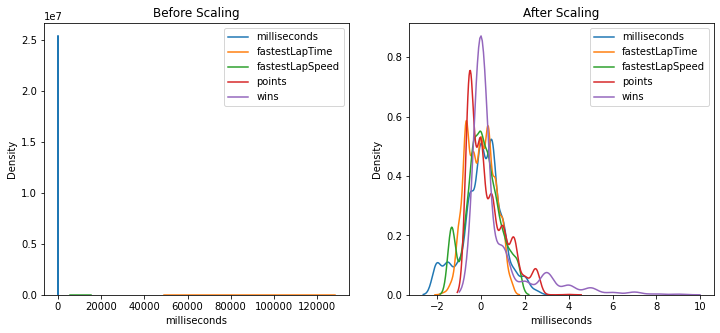

In [121]:
#'milliseconds','fastestLapTime','fastestLapSpeed','points','wins'
# let's compare the variable distributions before and after scaling

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['milliseconds'], ax=ax1, label ='milliseconds')
sns.kdeplot(X_train['fastestLapTime'], ax=ax1, label ='fastestLapTime')
sns.kdeplot(X_train['fastestLapSpeed'], ax=ax1, label ='fastestLapSpeed')
sns.kdeplot(X_train['points'], ax=ax1, label ='points')
sns.kdeplot(X_train['wins'], ax=ax1, label ='wins')
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
sns.kdeplot(X_train_scaled['milliseconds'], ax=ax2, label ='milliseconds')
sns.kdeplot(X_train_scaled['fastestLapTime'], ax=ax2, label ='fastestLapTime')
sns.kdeplot(X_train_scaled['fastestLapSpeed'], ax=ax2, label ='fastestLapSpeed')
sns.kdeplot(X_train_scaled['points'], ax=ax2, label ='points')
sns.kdeplot(X_train_scaled['wins'], ax=ax2, label ='wins')
ax2.legend()
plt.show()

# Data Cleansing and Transformation<a name="clean"></a>
<a href="#top">Back to Table of contents</a>

### Indentifying Outliers 
I created a diagnostic plot showcasing the Box Plot, Histogram and Q-Q Diagram for each numerical variables. This will help me look out for outliers and choose which are the variables that I want to target for transformations.

After analysing each of the numerical varibles, "Milliseconds" and "FastestLapSpeed" seem to contain significant amount of outliers. As positionOrder is our Target Variable, no tranformation would be necessary as we want to keep the values of the positionOrder as close to the original values as possible.


### Dealing with Outliers by capping

There are three ways to deal with outliers, either by capping or removal of the extreme values outside of the Box Plot interquatile range and also to do nothing about the outliers at all.

We can see that there are significant outliers present in "Milliseconds", "FastestLapSpeed", "Points" and "Wins", However, points and wins should be left untouched as the outliers have significant values which represents the total amount of points and wins each constructors had during every race. Hence, We will only be dealing with "Milliseconds" and "FastestLapSpeed". 
 
Furthermore, by using capping as our method of dealing with outliers, we are preserving each data point while also keeping the data as accurate as possible. This is because, we are replacing the extreme values with values that are closer to the mean of the variable which will make the data more concise. Additionally, since each race is important in predicting the positionOrder of each constructors, it will be more meaningful to keep as much data points as possible than to remove them completely.
 
### Numerical Variables Transformation
Since "Milliseconds" and "FastestLapSpeed" has undergone changes with their outliers, it will be better for these 2 variables to go through transformation to have them more normally distributed in terms of their histrogram and Q-Q plot diagrams. This will result in making the conclusions, obeservations and outcome of using the model more precise and accurate.

After applying each transformation methods on Milliseconds and FastestLapSpeed, I have realize that it would be more optimal for them to use different transformation method respectively rather than both having the same one applied. This is due to them having different magnitude of values in their columns and the transformation would not work as well for both simultanously. 

Therefore, after comparing each transformation method, I have concluded that it would be best for Milliseconds to undergo Reciprocal and FastestLapSpeed to use Yeo Johnson Transformation.

### Numerical Variable Imputation
By visualizing the percentage of missing values for each variable, we could see that the numerical variable fastestLapTime have some missing values that needs to be dealt with using different numerical imputation methods.

With "fastestLapTime", I have tested all the imputation methods and although there are minimal visual changes, there is slight changes with the RMSE and S-SQ values and by choosing the one with the best suitable values. I was able to determine that fastestLapTime wouldl be most suitable in undergoing mean-median imputation.

Mean Median impuation(Chosen) where the missing variables are replaced with the values that are the mean of other variables, taking the average of all the fastestLapTime and replacing missing variable with those number. This showed the most balanced histogram and Q-Q plot where most of the values are on the line.

Arbitrary value of -1 replacement where the missing variables are replaced with -1. However, this caused a lot of values of the left side and also a gap within the histogram causing it to not be suitable.

Replacing missing value by a value at the end of the distribution where the missing value is replaced by a value that is at the end of the interquatile range that is precalculated. However, this caused the missing values to be on the right side making the histogram right skewed and unsuitable.

Add Missing Incidicator for inputation, which replaces unused number for each missing value, this caused the Q-Q curve to be unreliable as the line was missing and also made no changes to the rest of the diagnostic plots. Hence it is not really useful in changing the missing values

Lastly, the random sample imputation replaces the missing values with random values to keep the data consistent. However, since our data is highly sensitive to random inputs as each of the constructor's timing is highly important to how they perform, it would be best to not use this method as it may worsen accuracy of the data within column.

### Categorical Data Encoding

The categorical variables will have their categorical datas replaces with numerical data through encoding methods. The variables that would need to be changed during this transformation would be "raceId","constructorId" and "name". However since raceId and constructorId are already numerical, it will see little changes except undergoing some standardization inconjunction with the "name" column. 

The encoding method used:

#### One Hot Encoding
One Hot Encoding would represent each of the categorical variable as a group of binary variable where they will be only given values of 0/1 indiciating if they are present within the observation with 0(no) and 1(yes). After doing this method, it caused the dataframe to be highly fragmented which worsen model performance since the categorical columns have too many unique datas.

#### One Hot Encoding of top categories (Chosen
Similar to One Hot Encoding but it fixes the issues of it being highly fragmented by limited the feature space drastically, as it reduces the number of binary variables. It will treat the less frequent catagories as a single unique categories apart from the rest. This results in all the categorical data to be in numerical and by choosing the top categories to be 10, it would better fit the the "name" variable and will make the dataset less fragmented.

#### Replacing categories with count or frequency of observations
Replacing categories with count or frequency of observations, it replaces the categories with the count or percentage of observations within that category. With counting, it will just count how many that unique value is observed while the frequency would be a calculation out of 100% where the percentage of the unique value will be given to proportion of how many it has out of the grand total. 

#### Ordered Ordinal Encoding
It replaces the categories with digits from 1 to n (where n is the number of distinct variables within the category) However this method is much more suitable for non-linear machine learning method. This method also introduced more NaN values for "name", "constructorId" and "raceId" which would not be elgibile for scaling hence not suitable.

#### Target Mean Encoding
It replaces the categories with the average target value for that category with frequeny being the values that will be inserted depending on the default value of each unique variables within the category. However, this causes NaN values to be introduced into the Name and also cause the replaced values to be invalid for scaling as the value they are representing will be inaccurate or illogical.

#### Rare Group Encoding

Rare Group Encoding, is the labelling of rare values, values that appear less than 5% of the time to "rare". As these rare values are often appearing in either test or train sets, it will make it prone to overfitting or poor performance of data for modelling. It would categorise these rare data into one category on its own to remove it. However,it would be not a good idea to use rare group encoding to label some of the lesser appearing values as rare and as it will be casted out when scaling.


### Variable Discretization/Binning

The numerical variables will have to have their data more evenly divided through discreization and binning. The variables that would need to be changed would be "Milliseconds","fastestLapTime","fastestLapSpeed","Points" and "Win". Although, since points and wins are already calculated columns, it would be unwise to make them undergo further binning as they do not need to follow an even distribution, it is also helpful to visually explore their binning processes.


#### Equal Width Discretization (Chosen)
In Equal Width Discretization, the variables are sorted into bins of the same range and size, the range and size is determined by the min and max values of the numerical data. I have chose to use 10 bins as a standard number for all these numerical values to be binned so as to have a more consistent bar chart plotted to see how each numerical variable differs from one another. Furthermore, by using 10, it will have a higher degree of accuracy as there is lesser range within each bin.

I chose this method as it not only show more distinct count between each bins but also have an overall lower RMSE value and R-SQ value that is closer to 1.

#### Discretization plus categorical encoding

After Discretization, the bins of each numerical variable can be treated as categorical variables, this would create a monotonic relationship between the bins and the target variable(positionOrder). It is useful in seeing how each of these variables would correspond with positionOrder either by being positively or negatively correlation or having no correlation at all when there is no line of best fit to be easily formed. 

However this would also cause NaN values to be introduced which will be a hinderance towards our scaling. Hence it can only be used outside of the steps for visual analysis of its graphs but not implimented.

#### Arbitrary interval discretization
This method will allow me to see which range of bins will be suitable for each specific variable, it provides me with histograms and values showing how big each bins should be while also showing me the content inside of each bins by showing the count value. However, this method is not chosen as it would be better to transform the 5 categories together to keep them standardized for comparison and keeping the numerical data more relatable towards one another with similar number of bins.


### Featured Engineering (Scaling)
#### Standardization
The process of standardization involving centering the variable at zero and limiting the variance to one. It subtracts the mean from each observation and divide the result by the standard deviation to standardize features. Resulting in a Z-Score for each values within the variables and shows how much standard deviation difference there is between the value and the its variable's mean.After scaling, we can see that all the values in the variables are between -1 and 1, showing that normalization has been done.

#### Mean Normalization
In Mean Normalization, We center the variable at zero and rescale the distribution to the value range. Subtracting the mean from each observation and then dividing the result by the difference between the minimum and maximum values. This results in the values being smaller in scale as it is closer to 0 with still the same limits as standardizations.

#### Min Max Scaling
Min Max Scaling, limits the values between 0 and 1, it subtracts the minimum values of each observation from each variable and divide by the Max and Min difference of the value. This reults in the values in all being positive while having shared values after scaling.

#### Max Absoulute Scaling
Maximum absolute scaling scales the data to its maximum value then it divides every observation by the maximum value of the variable itself. This results in the values being mostly positive with a much higher value as compared to Min Max Scaling.

#### Robust Scaling(Chosen)
Robust scaling, scales the variables along its quantiles and median, the median value is subtracted from the value and divided by the interquatile range of 75% and 25%. This produces a more robust estimate for the center and value range of the variable and would help variables that have insignifcant amount of outliers that was previously left alone.
  

### Show Count of Rows and Columns

In [122]:
X_train_final = X_train_scaled
X_test_final = X_test_scaled

y_train_final = y_train
y_test_final = y_test

In [123]:
X_train_final.shape

(1726, 25)

In [124]:
X_test_final.shape

(740, 25)

In [125]:
y_train_final.shape

(1726,)

In [126]:
y_test_final.shape

(740,)

In [127]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt


## 13 Linear Regression Model<a name="step13"></a>

In [128]:
# Build Linear Regression Model
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_final, y_train_final)

# Evaluate the Linear Regression Model using Root Mean Square Error (RMSE)
# The lower MAE, the better the model performance
print('My Model\'s train_mse:', mean_squared_error(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\nMy Model\'s test_mse:', mean_squared_error(y_test_final, model_linear_regression.predict(X_test_final)))
print()
print('My Model\'s train_rmse:', sqrt(mean_squared_error(y_train_final, model_linear_regression.predict(X_train_final))), 
      '\nMy Model\'s test_rmse:', sqrt(mean_squared_error(y_test_final, model_linear_regression.predict(X_test_final))))
print()
# Evaluate the Linear Regression Model using R-Square
# The closer the r-square value to 1, the better the model performance
print('My Model\'s train_r-sq:', r2_score(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\nMy Model\'s test_r-sq:', r2_score(y_test_final, model_linear_regression.predict(X_test_final)))

My Model's train_mse: 5.085289572829109 
My Model's test_mse: 5.818337875890752

My Model's train_rmse: 2.255058662835428 
My Model's test_rmse: 2.4121231054593277

My Model's train_r-sq: 0.6067224308262473 
My Model's test_r-sq: 0.5406411342244339


## 14 Naive Baseline Model<a name="step14"></a>

In [129]:
import numpy as np
from scipy import stats

# pick the mean target value from all of train data
print(y_train.mean())

mean_target_value = y_train.mean()

print(f"The train mean target value is {mean_target_value:.2f}.")

5.952491309385863
The train mean target value is 5.95.


In [130]:
y_train_preds_naive = [round(mean_target_value,2) for row in X_train.iloc[:,0]]
y_train_preds_naive[0:5]

[5.95, 5.95, 5.95, 5.95, 5.95]

In [131]:
y_test_preds_naive = [round(mean_target_value,2) for row in X_test.iloc[:,0]]
y_test_preds_naive[0:5]

[5.95, 5.95, 5.95, 5.95, 5.95]

In [132]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Mean Squared Error (the lower the better, 0 is best possible score)

# train MSE score
y_true = y_train
y_pred = y_train_preds_naive

train_mse_naive = mean_squared_error(y_true, y_pred)
print(f"The Naive Baseline Model's MSE on train data is {train_mse_naive:.2f}.")

# test MSE score
y_true = y_test
y_pred = y_test_preds_naive

test_mse_naive = mean_squared_error(y_true, y_pred)
print(f"The Naive Baseline Model's MSE on test data is {test_mse_naive:.2f}.")

print()

# Root Mean Squared Error (if MSE < 1, rooting it makes it numerically larger, vice-versa if MSE > 1)

# train RMSE score
y_true = y_train
y_pred = y_train_preds_naive

train_rmse_naive = mean_squared_error(y_true, y_pred, squared=False)
print(f"The Naive Baseline Model's RMSE on train data is {train_rmse_naive:.2f}.")

# test RMSE score
y_true = y_test
y_pred = y_test_preds_naive

test_rmse_naive = mean_squared_error(y_true, y_pred, squared=False)
print(f"The Naive Baseline Model's RMSE on test data is {test_rmse_naive:.2f}.")

print()

# R2 Value (Coefficient of Determination, which measures how well the X cols account for y's variance, 1.0 is best score)

# train R2 score
y_true = y_train
y_pred = y_train_preds_naive

train_r2_naive = r2_score(y_true, y_pred)
print(f"The Naive Baseline Model's R2 on train data is {train_r2_naive:.2f}.")

# test R2 score
y_true = y_test
y_pred = y_test_preds_naive

test_r2_naive = r2_score(y_true, y_pred)
print(f"The Naive Baseline Model's R2 on test data is {test_r2_naive:.2f}.")

The Naive Baseline Model's MSE on train data is 12.93.
The Naive Baseline Model's MSE on test data is 12.73.

The Naive Baseline Model's RMSE on train data is 3.60.
The Naive Baseline Model's RMSE on test data is 3.57.

The Naive Baseline Model's R2 on train data is -0.00.
The Naive Baseline Model's R2 on test data is -0.00.


## Machine Learning Modelling<a name="mlm"></a>
<a href="#top">Back to Table of contents</a>

### Linear Regression Model

#### Count of Rows and Columns
After doing .count()

There is 1726 rows and 25 columns in train

There is 720 rows and 25 columns in test

#### Comparison Values
After building our linear regression model, we could see important values such as RMSE and R-SQ being evaluated and used in many comparisons to detemine how good the model is.
#### Root Mean Square Error (RMSE)
The RMSE is the residuals' standard deviation (prediction errors). Residuals are a measure of how far the data points are from the regression line; RMSE is a measure of how spread out these residuals are. In other words, it indicates how close the data is clustered around the line of best fit. Therefore, the lower the RMSE, the better a given model is able to “fit” a dataset as it indiciate it being closer to the line of best fit.

#### R-Squared (R-SQ)
R-SQ is a statistical measure of the linear regression model that determines the proportion of variance in the target/dependent variable("positionOrder") that can be explained by the independent variable. In other words, r-squared shows how well the data fit the regression model. R-SQ values above 0.5 are considered acceptable as it means that at least half of the variables within the dataset can be explained using the model.
Therefore, it is good to aim for a RMSE that is relatively lower and R-SQ that is more than 0.5 and closest to 1.0.

After optimising the values for my linear regression model, the final out come is:

My Model's train_mse: 5.085289572829109 
My Model's test_mse: 5.818337875890752

My Model's train_rmse: 2.255058662835428 
My Model's test_rmse: 2.4121231054593277

My Model's train_r-sq: 0.6067224308262473 
My Model's test_r-sq: 0.5406411342244339

#### Method used from each segment

Dealing with Outlier ---> Capping

Numerical Transformation ---> Reciprocal Transformation(Milliseconds)

Numerical Transformation ---> Yeo Johnson Transformation(fastestLapSpeed)

Numerical Variable Imputation ---> Mean Median imputation

Categorical Data Encoding ---> One Hot Encodings for Top Categories

Variable Discretization/Binning ---> Equal Width Discretization

Featured Engineering(Scaling) ---> Robust Scaling

### Naive Baseline Model

#### Definition of a Naive Baseline Model
A Naive Baseline Model is a simple classification model that assumes little to nothing about the problem and the performance of which provides a baseline by which all other models evaluated on a dataset can be compared. It is used as a very basic, under developed model to compare with the mode created to show that the improvements made are positive and beneficial for the predictions and future usage of the model. 

As such, it is normal to see that the evaluation from the Naive baseline model is very bad and poor so as to justify the model created being highly more capable and have a higher potential at making predictions.

The results from the Naive Baseline Model are as such:

The Naive Baseline Model's MSE on train data is 12.93.
The Naive Baseline Model's MSE on test data is 12.73.

The Naive Baseline Model's RMSE on train data is 3.60.
The Naive Baseline Model's RMSE on test data is 3.57.

The Naive Baseline Model's R2 on train data is -0.00.
The Naive Baseline Model's R2 on test data is -0.00.

### Comparing My Regression Model with the Naive Baseline Model

#### RMSE Value

My Model's train_rmse: 2.255058662835428 vs The Naive Baseline Model's RMSE on train data is 3.60.

My Model's test_rmse: 2.4121231054593277 vs The Naive Baseline Model's RMSE on test data is 3.57.

With a much lower RMSE value for both train and test sets, it is safe to assume that my model has better fit than an ordinary naive baseline model as more of my values are closer to the line of best fit and would have lesser deviations hence lesser errors.


#### R-SQ value

My Model's train_r-sq: 0.6067224308262473 vs The Naive Baseline Model's R2 on train data is -0.00.

My Model's test_r-sq: 0.5406411342244339 vs The Naive Baseline Model's R2 on test data is -0.00.

With my Model's R-sq value being significantly closer to 1 as compared to the Naive Baseline Model's 0. It is safe to say that my model have more variables that are explainable by the model itself as the values are within the acceptable range of being more than 0.5. 

t also tells me that I have optimised a model that have more variables that can correlate with the Target Variable (positionOrder) when predicting for my prediction problem of (Regression problem: To predict the position of the first 10 constructors)









## Summary and Further Improvments<a name="sum"></a>
<a href="#top">Back to Table of contents</a>

My findings was that there is only an adequate amount of data that correlates with my target variable (positionOrder) when trying to predict which constructor would come in which position in the future. With a rather average r-sq value being slighly higher than 0.5, it tells me that not all the data show direct relationship with the target variable. As such there are many improvements that can be done towards the datasets given to us as well as information that could be given to allow us to create a more sophisticated and robust dataset in finding solutions for simple prediction problems.

### Possible Further Improvments

#### 1. Better standardization of Data
With most of the data being numerical, it is already significantly more difficult for the computer to differentiate each value's magnitude relatively to one another such as time and milliseconds, or lap time all having different ways of measuring time spent. There is also a lot of data that are closely related to each other that should not be repeated such as position and positionOrder, this would otherwise create further confusion for the computer to manage as each of those columns have different values for seemingly trying to describe the same thing. 

#### 2. Having highly functional Datasets
With many datasets that are trying to describe only small amount of details, it would be better for them to be concentrated into a bigger dataframe for consistency. This will make it easier for the computer to merge data together without compromising too much data when using inner join and when there are lesser data being compromised, the degree of accuracy when using the model would increase. Further examples of low functioning datasets would include, constructors table only showing relatively few important data such as name and nationality and status which is to only describe statusId.

#### 3. Additional valuable variables for modelling
For both categorical and numerical variables, I feel that the only dataset that showed an adequate amount of data would be the results dataset and even that feels incomplete with many lacking data and details such as weather, turning rates, number of pits stop, pitstop crew size just to name a few. With F1 being a fascinating sport, there is bound to be abundance data when there are many enthusiasts out there trying to predict the upcoming winners or finalists as fans can be passionately supporting their favourite constructors(brands) or racers(drivers).

By adding details to the datasets given from more sources, it will allow us to have more variables to form relationships and correlations with our target variables and hence allowing us to filter or scale them accordingly to make a even more robust dataset that can answer to more complex predictions problems without needing to limit the categorical datas (Such as limiting to finding which singular driver or constructor). 